In [21]:
ls

nsl-kdd.zip  sample_data/


In [24]:
# Install required library
!pip install rarfile

# Import necessary libraries
import rarfile
import os

# Specify the path to your uploaded .rar file in Google Colab
rar_path = '/content/nsl-kdd.rar'  # Adjust this path if the file is in a different location
extract_path = '/content'  # Directory where files will be extracted

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the .rar file
try:
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(extract_path)
    print(f"Successfully extracted {rar_path} to {extract_path}")

    # List the extracted files
    extracted_files = os.listdir(extract_path)
    print("Extracted files:", extracted_files)
except Exception as e:
    print(f"An error occurred: {str(e)}")

Successfully extracted /content/nsl-kdd.rar to /content
Extracted files: ['.config', '.ipynb_checkpoints', 'sample_data', 'nsl-kdd', 'nsl-kdd.rar']


In [25]:
cd nsl-kdd/

/content/nsl-kdd


In [26]:
ls

index.html*       KDDTest-21.txt*  KDDTrain1.jpg*             KDDTrain+.arff*
KDDTest1.jpg*     KDDTest+.arff*   KDDTrain+_20Percent.arff*  KDDTrain+.txt*
KDDTest-21.arff*  KDDTest+.txt*    KDDTrain+_20Percent.txt*


In [27]:
pwd

'/content/nsl-kdd'

In [28]:
pip install arff

Loading NSL-KDD training data from /content/nsl-kdd/KDDTrain+.txt...
Successfully loaded training data: 125973 records

=== Training Data Quality Report ===
Shape: (125973, 43)
Missing values: 0
Duplicate rows: 0
Training data: 125973 records, 56 features
Binary class distribution: Normal=67343, Attack=58630
Attack types found: 22 different types

Loading NSL-KDD test data from /content/nsl-kdd/KDDTest+.txt...
Successfully loaded test data: 22544 records

=== Test Data Quality Report ===
Shape: (22544, 43)
Missing values: 0
Duplicate rows: 0
Test data: 22544 records, 56 features
Binary class distribution: Normal=9711, Attack=12833

=== Performing Comprehensive EDA ===


/tmp/ipython-input-2383906342.py:688: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data, labels=[col[:10] for col in numeric_cols])  # Truncate labels
/tmp/ipython-input-2383906342.py:993: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([normal_duration, attack_duration], labels=['Normal', 'Attack'])


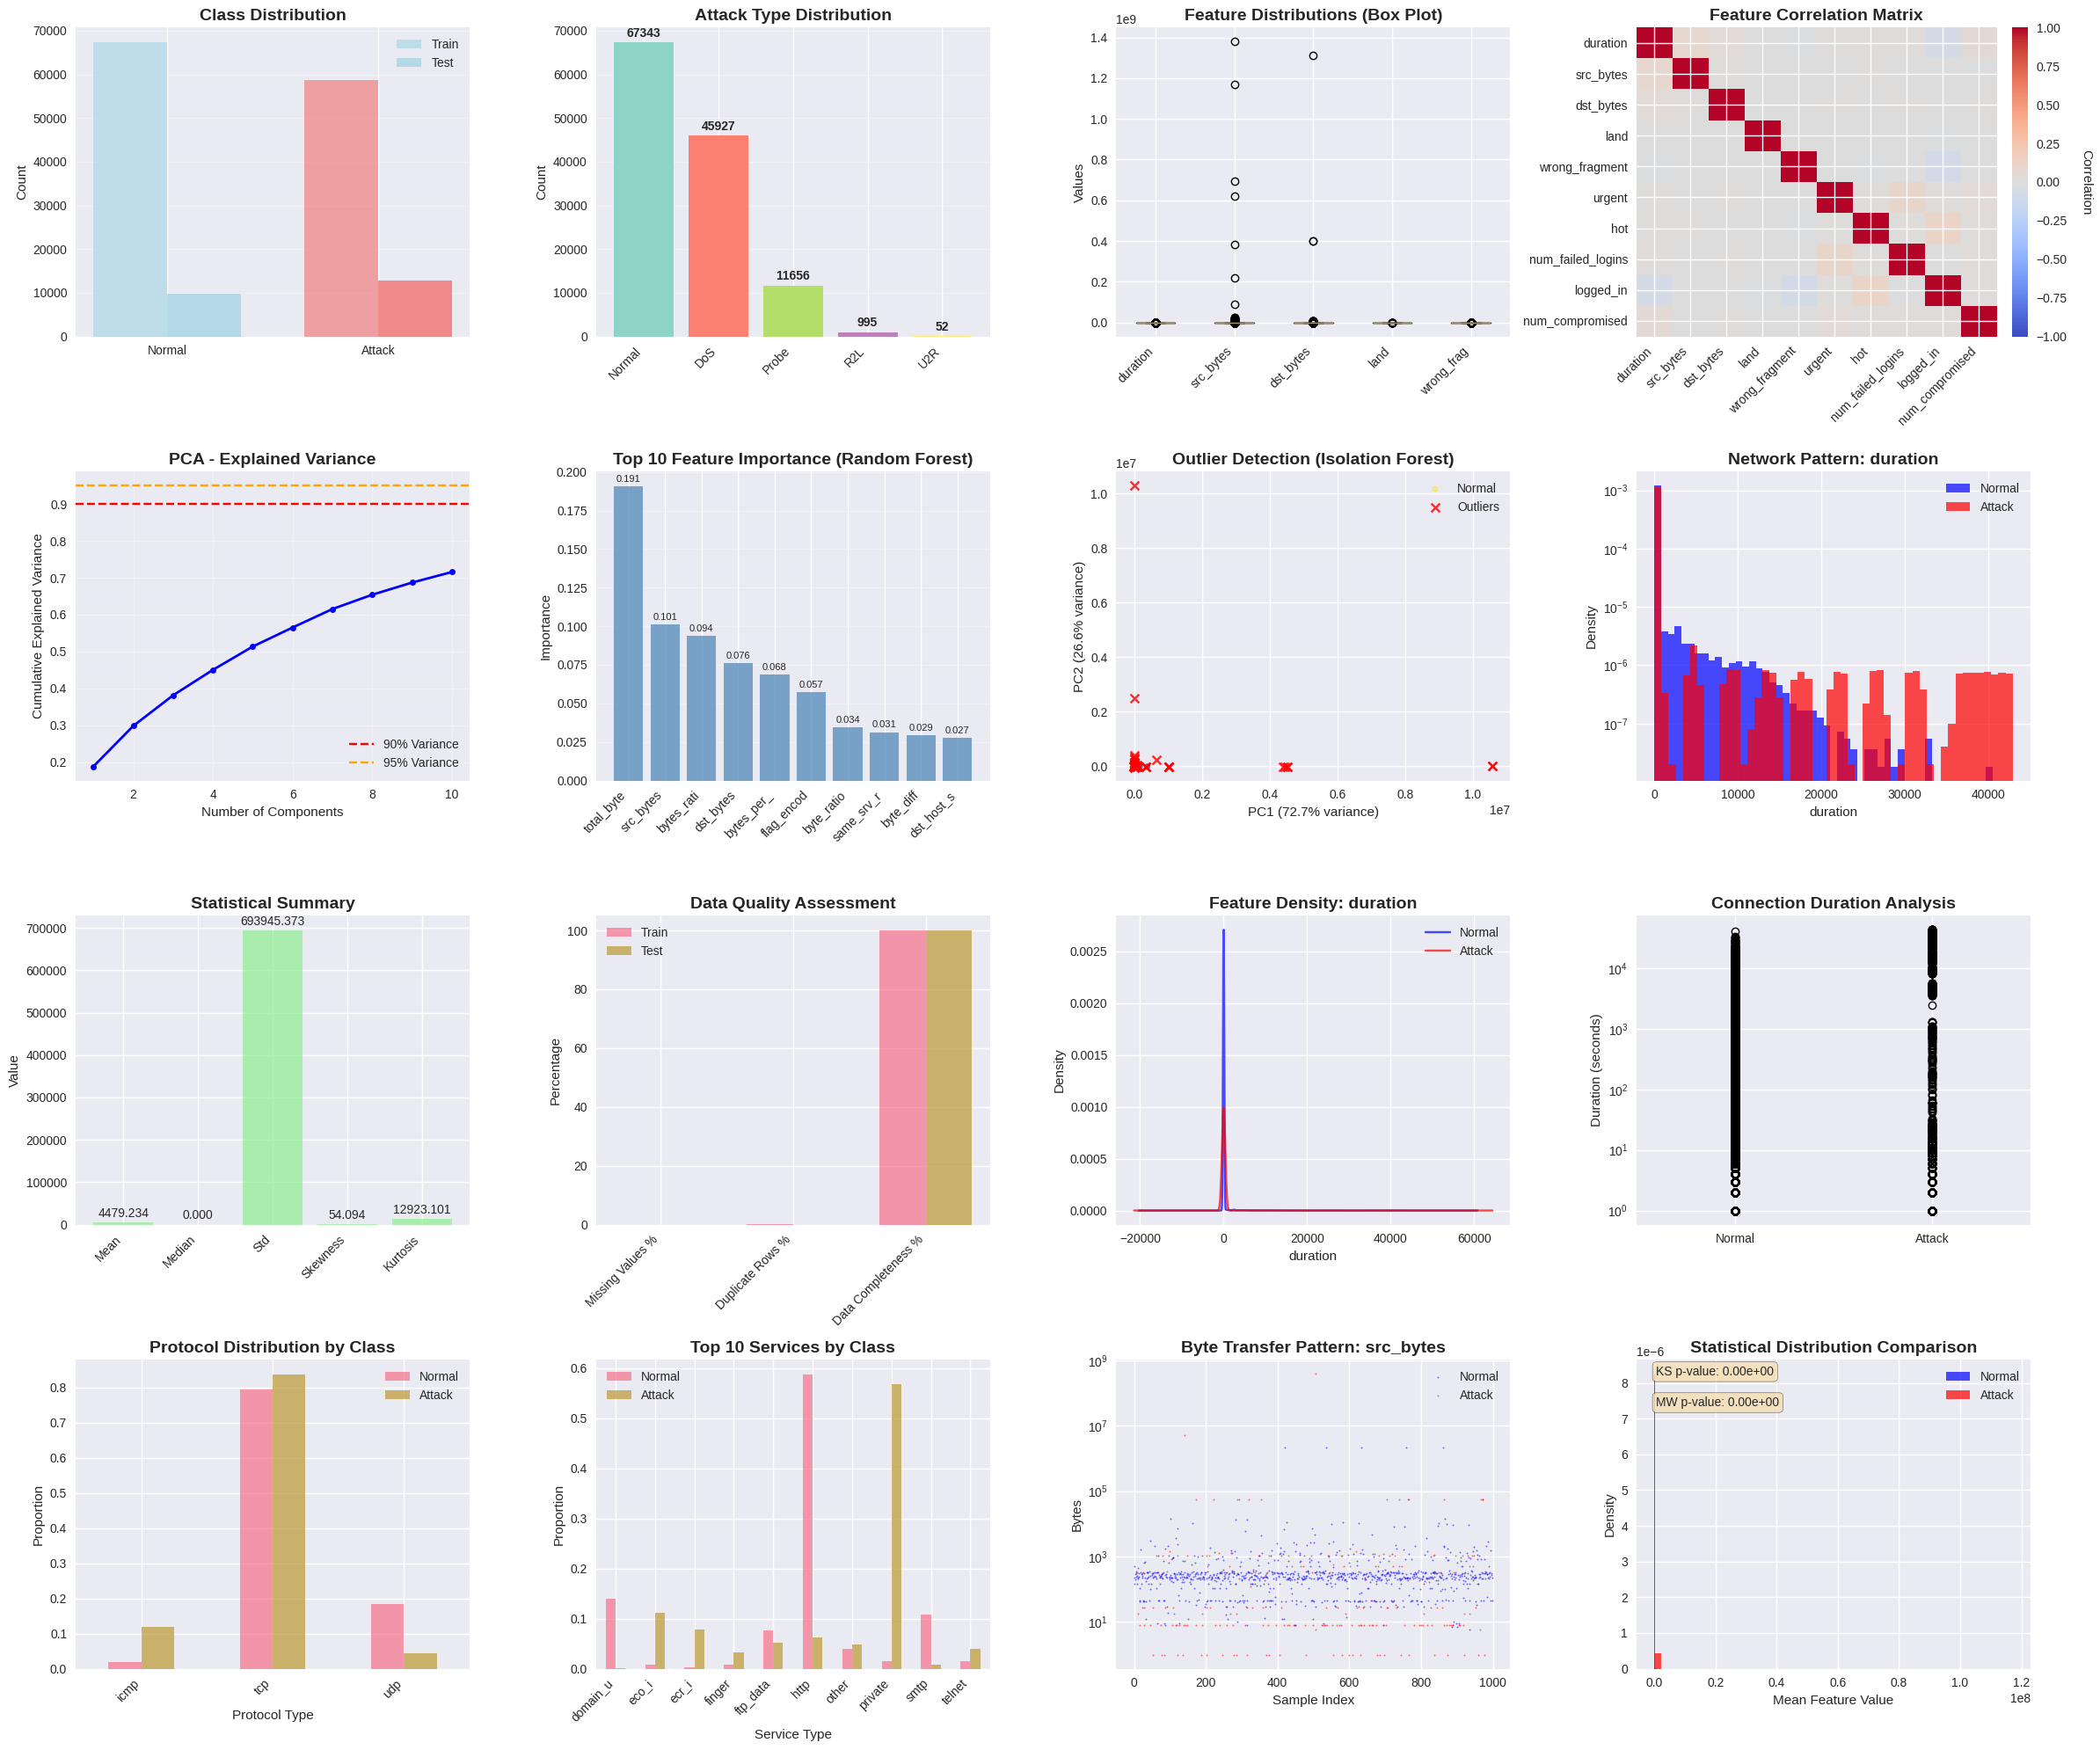


COMPREHENSIVE NSL-KDD DATASET STATISTICAL REPORT

📊 DATASET OVERVIEW
Training samples: 125,973
Test samples: 22,544
Features: 56

🎯 CLASS DISTRIBUTION
Training - Normal: 67,343 (53.5%)
Training - Attack: 58,630 (46.5%)
Imbalance Ratio: 1.15:1
Test - Normal: 9,711 (43.1%)
Test - Attack: 12,833 (56.9%)

🔥 ATTACK TYPES ANALYSIS
DoS: 45,927 (78.3%)
Probe: 11,656 (19.9%)
R2L: 995 (1.7%)
U2R: 52 (0.1%)

📈 FEATURE ANALYSIS
Numeric features: 53
Categorical features: 3

Numeric Feature Statistics:
Mean range: [0.000, 65345.857]
Std range: [0.000, 7116250.387]
Skewness range: [-0.950, 354.927]

🔍 DATA QUALITY
Missing values: 0 (0.00%)
Duplicate rows: 16
Zero variance features: 1

💡 RECOMMENDATIONS
• Consider removing highly correlated features:
  - duration & duration_per_packet (r=0.984)
  - duration & duration_sqrt (r=0.948)
  - src_bytes & bytes_per_packet (r=0.947)
  - src_bytes & byte_ratio (r=0.999)
  - dst_bytes & bytes_ratio (r=1.000)
• Consider outlier detection and treatment
• Apply f

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.utils.class_weight import compute_class_weight
import time
# Add the missing import for FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
import joblib
import os
import warnings
import arff
warnings.filterwarnings("ignore", category=UserWarning)

class EnhancedHybridIDS:
    """
    Enhanced Hybrid Intrusion Detection System with multiple improvements:
    - Better handling of class imbalance
    - Cross-validation support
    - Feature selection capabilities
    - Weighted ensemble with optimized weights
    - Real-time performance monitoring
    - Enhanced evaluation metrics
    """

    def __init__(self, weights=None, random_state=42, feature_selection=True, n_features=None):
        """
        Initialize the Enhanced Hybrid IDS.

        Parameters:
        -----------
        weights : list, optional (default=None)
            Weights for the ensemble models [NB_weight, IF_weight, XGB_weight]
            If None, will be optimized based on individual model performance
        random_state : int, optional (default=42)
            Random seed for reproducibility
        feature_selection : bool, optional (default=True)
            Whether to apply feature selection
        n_features : int, optional (default=None)
            Number of features to select (if None, will be optimized)
        """
        self.weights = weights
        self.random_state = random_state
        self.feature_selection = feature_selection
        self.n_features = n_features
        self.nb_model = None
        self.if_model = None
        self.xgb_model = None
        self.ocsvm_model = None  # Additional anomaly detector
        self.preprocessor = None
        self.feature_selector = None
        self.label_encoder = None
        self.class_weights = None
        self.optimal_weights = None
        self.training_time = 0
        self.inference_times = []

    def generate_synthetic_data(self, n_samples=10000, n_features=30, attack_ratio=0.2, seed=None):
        """
        Generate enhanced synthetic network traffic data with more realistic patterns.
        """
        seed = seed if seed is not None else self.random_state
        np.random.seed(seed)

        # Calculate number of samples for each class
        n_attack = int(n_samples * attack_ratio)
        n_normal = n_samples - n_attack

        # Generate normal samples (multiple modes for more realism)
        X_normal = np.concatenate([
            np.random.normal(loc=0.0, scale=1.0, size=(n_normal//2, n_features)),
            np.random.normal(loc=1.0, scale=0.8, size=(n_normal//2, n_features))
        ])
        y_normal = np.zeros(n_normal, dtype=int)

        # Generate attack samples (different attack types)
        X_attack = np.concatenate([
            # DoS attacks - high volume features
            np.random.normal(loc=5.0, scale=1.5, size=(n_attack//3, n_features)),
            # Probe attacks - scanning patterns
            np.random.normal(loc=3.0, scale=2.0, size=(n_attack//3, n_features)),
            # Other attacks
            np.random.normal(loc=4.0, scale=1.2, size=(n_attack - 2*(n_attack//3), n_features))
        ])
        y_attack = np.ones(n_attack, dtype=int)

        # Combine and shuffle
        X = np.vstack((X_normal, X_attack))
        y = np.concatenate((y_normal, y_attack))

        # Shuffle the dataset
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        return X, y

    def create_network_features(self, df):
        """
        Create domain-specific network features for better intrusion detection.
        """
        # Only apply if we have recognizable network features
        feature_columns = df.columns.tolist()

        # Common NSL-KDD derived features
        if 'src_bytes' in feature_columns and 'count' in feature_columns:
            df['bytes_per_packet'] = df['src_bytes'] / (df['count'] + 1)

        if 'duration' in feature_columns and 'count' in feature_columns:
            df['duration_per_packet'] = df['duration'] / (df['count'] + 1)

        if 'dst_bytes' in feature_columns and 'src_bytes' in feature_columns:
            df['bytes_ratio'] = df['dst_bytes'] / (df['src_bytes'] + 1)

        # Service and protocol patterns
        if 'service' in feature_columns:
            # Count of unique services
            df['service_encoded'] = pd.Categorical(df['service']).codes

        if 'flag' in feature_columns:
            df['flag_encoded'] = pd.Categorical(df['flag']).codes

        # Error rates aggregations
        error_cols = [col for col in feature_columns if 'error' in col.lower()]
        if error_cols:
            df['total_error_rate'] = df[error_cols].sum(axis=1)

        return df

    def load_data(self, filepath, label_col='label', sep=',', drop_cols=None, binary_classification=True):
        """Enhanced data loading with feature engineering."""
        print(f"Loading data from {filepath}...")

        try:
            if filepath.endswith('.arff'):
                with open(filepath, 'r') as f:
                    arff_data = arff.load(f)
                    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
            else:
                df = pd.read_csv(filepath, sep=sep)
                print(f"Successfully loaded data: {df.shape[0]} records, {df.shape[1]} features")
        except Exception as e:
            print(f"Error loading data: {e}")
            raise

        # Apply feature engineering
        print("Applying feature engineering...")
        df = self.create_network_features(df)

        # Extract features and target
        if label_col in df.columns:
            X = df.drop(columns=[label_col])
            y = df[label_col]

            if drop_cols:
                X = X.drop(columns=drop_cols, errors='ignore')

            # Handle binary classification
            if binary_classification:
                print("\nClass distribution before conversion:")
                print(y.value_counts())

                unique_values = y.unique()
                if len(unique_values) > 2 or not set(unique_values).issubset({0, 1}):
                    if y.dtype == object:
                        y = y.apply(lambda x: 0 if x.lower() == 'normal' else 1)
                    else:
                        y = (y != 0).astype(int)

                print("\nClass distribution after conversion:")
                print(f"Normal (0): {sum(y == 0)}")
                print(f"Attack (1): {sum(y == 1)}")
        else:
            raise ValueError(f"Label column '{label_col}' not found in dataset")

        return X, y

    def load_nsl_kdd(self, train_path, test_path=None):

        """Enhanced NSL-KDD loading with comprehensive data validation and feature engineering."""
        col_names = [
            'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
            'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
            'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
            'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
        ]

        # Load training data
        print(f"Loading NSL-KDD training data from {train_path}...")
        try:
            if train_path.endswith('.arff'):
                import arff
                with open(train_path, 'r') as f:
                    arff_data = arff.load(f)
                    train_df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
            else:
                train_df = pd.read_csv(train_path, header=None, names=col_names)
            print(f"Successfully loaded training data: {train_df.shape[0]} records")
        except Exception as e:
            print(f"Error loading training data: {e}")
            raise

        # Data quality checks
        print("\n=== Training Data Quality Report ===")
        print(f"Shape: {train_df.shape}")
        print(f"Missing values: {train_df.isnull().sum().sum()}")
        print(f"Duplicate rows: {train_df.duplicated().sum()}")

        # Handle missing values and data quality issues
        train_df = self._clean_data(train_df)

        # Apply enhanced feature engineering
        train_df = self.create_enhanced_network_features(train_df)

        # Drop difficulty level and extract features
        if 'difficulty_level' in train_df.columns:
            train_df = train_df.drop('difficulty_level', axis=1)

        X_train = train_df.drop('label', axis=1)
        y_train = train_df['label']

        # Enhanced label processing with attack type mapping
        self.attack_types = self._map_attack_types(y_train)
        y_train_binary = (y_train != 'normal').astype(int)

        print(f"Training data: {X_train.shape[0]} records, {X_train.shape[1]} features")
        print(f"Binary class distribution: Normal={sum(y_train_binary == 0)}, Attack={sum(y_train_binary == 1)}")
        print(f"Attack types found: {len(self.attack_types)} different types")

        # Load test data if provided
        X_test, y_test, y_test_binary = None, None, None
        if test_path:
            print(f"\nLoading NSL-KDD test data from {test_path}...")
            try:
                if test_path.endswith('.arff'):
                    import arff
                    with open(test_path, 'r') as f:
                        arff_data = arff.load(f)
                        test_df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
                else:
                    test_df = pd.read_csv(test_path, header=None, names=col_names)
                print(f"Successfully loaded test data: {test_df.shape[0]} records")
            except Exception as e:
                print(f"Error loading test data: {e}")
                raise

            # Data quality checks for test data
            print("\n=== Test Data Quality Report ===")
            print(f"Shape: {test_df.shape}")
            print(f"Missing values: {test_df.isnull().sum().sum()}")
            print(f"Duplicate rows: {test_df.duplicated().sum()}")

            # Clean test data
            test_df = self._clean_data(test_df)

            # Apply enhanced feature engineering
            test_df = self.create_enhanced_network_features(test_df)

            if 'difficulty_level' in test_df.columns:
                test_df = test_df.drop('difficulty_level', axis=1)

            X_test = test_df.drop('label', axis=1)
            y_test = test_df['label']
            y_test_binary = (y_test != 'normal').astype(int)

            print(f"Test data: {X_test.shape[0]} records, {X_test.shape[1]} features")
            print(f"Binary class distribution: Normal={sum(y_test_binary == 0)}, Attack={sum(y_test_binary == 1)}")

        # Perform comprehensive EDA
        self.perform_comprehensive_eda(X_train, y_train_binary, y_train, X_test, y_test_binary, y_test)

        return X_train, y_train_binary, X_test, y_test_binary

    def _clean_data(self, df):
        """Clean and preprocess raw data."""
        # Remove any rows with all NaN values
        df = df.dropna(how='all')

        # Handle infinite values
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

        # Fill NaN values in numeric columns with median
        for col in numeric_columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].median(), inplace=True)

        # Fill NaN values in categorical columns with mode
        categorical_columns = df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].mode()[0], inplace=True)

        return df

    def _map_attack_types(self, labels):
        """Map attack labels to categories."""
        attack_mapping = {
            # DoS attacks
            'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
            'mailbomb': 'DoS', 'processtable': 'DoS', 'udpstorm': 'DoS', 'apache2': 'DoS',

            # Probe attacks
            'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'satan': 'Probe', 'mscan': 'Probe',
            'saint': 'Probe',

            # R2L attacks
            'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L',
            'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
            'snmpgetattack': 'R2L', 'snmpguess': 'R2L', 'worm': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L',

            # U2R attacks
            'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R', 'httptunnel': 'U2R',
            'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R'
        }

        unique_attacks = labels[labels != 'normal'].unique()
        mapped_types = {}
        for attack in unique_attacks:
            mapped_types[attack] = attack_mapping.get(attack, 'Unknown')

        return mapped_types

    def create_enhanced_network_features(self, df):
        """Create advanced network features for better detection."""
        # Original basic features (if not already present)
        if hasattr(self, 'create_network_features'):
            df = self.create_network_features(df)

        # Advanced feature engineering
        # Byte-related features
        if 'src_bytes' in df.columns and 'dst_bytes' in df.columns:
            df['total_bytes'] = df['src_bytes'] + df['dst_bytes']
            df['byte_ratio'] = np.where(df['dst_bytes'] != 0,
                                      df['src_bytes'] / df['dst_bytes'],
                                      df['src_bytes'])
            df['byte_diff'] = df['src_bytes'] - df['dst_bytes']

        # Connection-related features
        if 'count' in df.columns and 'srv_count' in df.columns:
            df['srv_to_conn_ratio'] = np.where(df['count'] != 0,
                                              df['srv_count'] / df['count'], 0)

        # Error rate combinations
        error_cols = [col for col in df.columns if 'error_rate' in col or 'rerror_rate' in col]
        if len(error_cols) >= 2:
            df['total_error_rate'] = df[error_cols].sum(axis=1)
            df['avg_error_rate'] = df[error_cols].mean(axis=1)

        # Time-based features (if duration available)
        if 'duration' in df.columns:
            df['duration_log'] = np.log1p(df['duration'])
            df['duration_sqrt'] = np.sqrt(df['duration'])

        # Host-based aggregations
        host_cols = [col for col in df.columns if col.startswith('dst_host_')]
        if len(host_cols) > 0:
            df['host_features_sum'] = df[host_cols].sum(axis=1)
            df['host_features_mean'] = df[host_cols].mean(axis=1)

        return df

    def preprocess_data(self, X, y=None, fit_scaler=True):
        """Enhanced preprocessing with robust feature selection and outlier handling."""
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        print(f"\n=== Data Preprocessing ===")
        print(f"Input shape: {X.shape}")

        # Identify numeric and categorical columns
        numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

        print(f"Numeric features: {len(numeric_features)}")
        print(f"Categorical features: {len(categorical_features)}")

        # Enhanced preprocessing pipeline with outlier handling
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('outlier_clipper', FunctionTransformer(
                lambda x: np.clip(x,
                                np.percentile(x, 1, axis=0),
                                np.percentile(x, 99, axis=0)),
                validate=False
            )),
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'))
        ])

        # Apply preprocessing
        if fit_scaler:
            # Create column transformer
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ],
                remainder='passthrough'
            )

            print("Fitting and transforming data...")
            X_processed = preprocessor.fit_transform(X)
            self.preprocessor = preprocessor

            # Get feature names after preprocessing
            feature_names = self._get_feature_names(preprocessor, numeric_features, categorical_features)

            # Apply enhanced feature selection if enabled
            if self.feature_selection and y is not None:
                print("Applying enhanced feature selection...")
                X_processed, selected_features = self._apply_feature_selection(X_processed, y, feature_names)
                self.selected_features = selected_features

        else:
            print("Transforming data using fitted preprocessor...")
            try:
                X_processed = self.preprocessor.transform(X)
                if self.feature_selector is not None:
                    X_processed = self.feature_selector.transform(X_processed)
            except Exception as e:
                print(f"Warning: Error during transformation: {e}")
                print("Attempting direct transformation...")
                X_processed = X.values if isinstance(X, pd.DataFrame) else X

        print(f"Final processed shape: {X_processed.shape}")

        # Convert y to numpy array if provided
        if y is not None:
            if isinstance(y, pd.Series):
                y = y.values

        return X_processed, y

    def _get_feature_names(self, preprocessor, numeric_features, categorical_features):
        """Get feature names after preprocessing."""
        feature_names = []

        # Add numeric feature names
        feature_names.extend(numeric_features)

        # Add categorical feature names (after one-hot encoding)
        for transformer_name, transformer, features in preprocessor.transformers_:
            if transformer_name == 'cat':
                if hasattr(transformer.named_steps['onehot'], 'get_feature_names_out'):
                    cat_names = transformer.named_steps['onehot'].get_feature_names_out(features)
                    feature_names.extend(cat_names)
                else:
                    # Fallback for older sklearn versions
                    feature_names.extend([f"{feat}_{i}" for feat in features
                                        for i in range(len(transformer.named_steps['onehot'].categories_[0]))])

        return feature_names

    def _apply_feature_selection(self, X_processed, y, feature_names):
        """Apply multiple feature selection methods and combine results."""
        from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.linear_model import LogisticRegression

        n_features_target = min(50, X_processed.shape[1] // 2)

        # Method 1: Statistical tests (F-test)
        selector_f = SelectKBest(score_func=f_classif, k=n_features_target)
        X_f = selector_f.fit_transform(X_processed, y)
        features_f = np.where(selector_f.get_support())[0]

        # Method 2: Mutual information
        selector_mi = SelectKBest(score_func=mutual_info_classif, k=n_features_target)
        X_mi = selector_mi.fit_transform(X_processed, y)
        features_mi = np.where(selector_mi.get_support())[0]

        # Method 3: Recursive Feature Elimination with Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        selector_rfe = RFE(estimator=rf, n_features_to_select=n_features_target, step=1)
        X_rfe = selector_rfe.fit_transform(X_processed, y)
        features_rfe = np.where(selector_rfe.get_support())[0]

        # Combine features (take intersection for most reliable)
        common_features = list(set(features_f) & set(features_mi) & set(features_rfe))

        # If intersection is too small, take union of top features
        if len(common_features) < n_features_target // 2:
            all_features = list(set(features_f) | set(features_mi) | set(features_rfe))
            # Score each feature by how many methods selected it
            feature_scores = {}
            for feat in all_features:
                score = 0
                if feat in features_f: score += 1
                if feat in features_mi: score += 1
                if feat in features_rfe: score += 1
                feature_scores[feat] = score

            # Sort by score and take top n_features_target
            sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
            selected_indices = [feat[0] for feat in sorted_features[:n_features_target]]
        else:
            selected_indices = common_features

        # Create final selector
        self.feature_selector = SelectKBest(score_func=f_classif, k=len(selected_indices))
        mask = np.zeros(X_processed.shape[1], dtype=bool)
        mask[selected_indices] = True
        self.feature_selector.scores_ = np.ones(X_processed.shape[1])
        self.feature_selector.pvalues_ = np.ones(X_processed.shape[1])
        self.feature_selector._get_support_mask = lambda: mask

        X_selected = X_processed[:, selected_indices]
        selected_feature_names = [feature_names[i] for i in selected_indices] if feature_names else selected_indices

        print(f"Selected {len(selected_indices)} features using ensemble method")
        print(f"Feature selection methods agreement: F-test={len(features_f)}, MI={len(features_mi)}, RFE={len(features_rfe)}, Common={len(common_features)}")

        return X_selected, selected_feature_names

    def perform_comprehensive_eda(self, X_train, y_train_binary, y_train_labels=None,
                                X_test=None, y_test_binary=None, y_test_labels=None):
        """Perform comprehensive exploratory data analysis with advanced visualizations."""
        print("\n=== Performing Comprehensive EDA ===")

        # Set up the plotting environment
        plt.style.use('seaborn-v0_8')
        sns.set_palette("husl")

        # Create figure with subplots
        fig = plt.figure(figsize=(24, 20))

        # 1. Class Distribution Analysis
        ax1 = plt.subplot(4, 4, 1)
        self._plot_class_distribution(y_train_binary, y_train_labels, y_test_binary, y_test_labels, ax1)

        # 2. Attack Type Distribution (if labels available)
        if y_train_labels is not None:
            ax2 = plt.subplot(4, 4, 2)
            self._plot_attack_types(y_train_labels, y_test_labels, ax2)

        # 3. Feature Distribution Analysis
        ax3 = plt.subplot(4, 4, 3)
        self._plot_feature_distributions(X_train, ax3)

        # 4. Correlation Matrix
        ax4 = plt.subplot(4, 4, 4)
        self._plot_correlation_matrix(X_train, ax4)

        # 5. Principal Component Analysis
        ax5 = plt.subplot(4, 4, 5)
        self._plot_pca_analysis(X_train, y_train_binary, ax5)

        # 6. Feature Importance (if available)
        ax6 = plt.subplot(4, 4, 6)
        self._plot_feature_importance(X_train, y_train_binary, ax6)

        # 7. Outlier Detection
        ax7 = plt.subplot(4, 4, 7)
        self._plot_outlier_analysis(X_train, y_train_binary, ax7)

        # 8. Network Traffic Patterns
        ax8 = plt.subplot(4, 4, 8)
        self._plot_network_patterns(X_train, y_train_binary, ax8)

        # 9. Statistical Summary
        ax9 = plt.subplot(4, 4, 9)
        self._plot_statistical_summary(X_train, y_train_binary, ax9)

        # 10. Data Quality Assessment
        ax10 = plt.subplot(4, 4, 10)
        self._plot_data_quality(X_train, X_test, ax10)

        # 11. Feature Density Plots
        ax11 = plt.subplot(4, 4, 11)
        self._plot_feature_density(X_train, y_train_binary, ax11)

        # 12. Temporal Analysis (if duration feature exists)
        ax12 = plt.subplot(4, 4, 12)
        self._plot_temporal_analysis(X_train, y_train_binary, ax12)

        # 13. Protocol Analysis
        ax13 = plt.subplot(4, 4, 13)
        self._plot_protocol_analysis(X_train, y_train_binary, ax13)

        # 14. Service Analysis
        ax14 = plt.subplot(4, 4, 14)
        self._plot_service_analysis(X_train, y_train_binary, ax14)

        # 15. Byte Transfer Analysis
        ax15 = plt.subplot(4, 4, 15)
        self._plot_byte_analysis(X_train, y_train_binary, ax15)

        # 16. Advanced Statistics
        ax16 = plt.subplot(4, 4, 16)
        self._plot_advanced_statistics(X_train, y_train_binary, ax16)

        plt.tight_layout()
        plt.savefig('comprehensive_nsl_kdd_eda.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Generate detailed statistical report
        self._generate_statistical_report(X_train, y_train_binary, y_train_labels, X_test, y_test_binary, y_test_labels)

    def _plot_class_distribution(self, y_train_binary, y_train_labels, y_test_binary, y_test_labels, ax):
        """Plot class distribution for binary and multiclass."""
        # Binary distribution
        train_counts = np.bincount(y_train_binary)
        labels = ['Normal', 'Attack']
        colors = ['lightblue', 'lightcoral']

        bars = ax.bar(labels, train_counts, color=colors, alpha=0.7, edgecolor='black')

        # Add percentages
        total = sum(train_counts)
        for i, (bar, count) in enumerate(zip(bars, train_counts)):
            percentage = count / total * 100
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total*0.01,
                    f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

        # Add test data if available
        if y_test_binary is not None:
            test_counts = np.bincount(y_test_binary)
            x_pos = np.arange(len(labels))
            width = 0.35
            ax.clear()
            ax.bar(x_pos - width/2, train_counts, width, label='Train', color=colors, alpha=0.7)
            ax.bar(x_pos + width/2, test_counts, width, label='Test', color=colors, alpha=0.9)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(labels)
            ax.legend()

        ax.set_title('Class Distribution', fontsize=14, fontweight='bold')
        ax.set_ylabel('Count')
        ax.grid(axis='y', alpha=0.3)

    def _plot_attack_types(self, y_train_labels, y_test_labels, ax):
        """Plot distribution of different attack types."""
        # Map to attack categories
        train_categories = []
        for label in y_train_labels:
            if label == 'normal':
                train_categories.append('Normal')
            else:
                train_categories.append(self.attack_types.get(label, 'Unknown'))

        category_counts = pd.Series(train_categories).value_counts()

        colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
        bars = ax.bar(range(len(category_counts)), category_counts.values, color=colors)

        # Add value labels
        for bar, count in zip(bars, category_counts.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(category_counts)*0.01,
                    str(count), ha='center', va='bottom', fontweight='bold')

        ax.set_xticks(range(len(category_counts)))
        ax.set_xticklabels(category_counts.index, rotation=45, ha='right')
        ax.set_title('Attack Type Distribution', fontsize=14, fontweight='bold')
        ax.set_ylabel('Count')
        ax.grid(axis='y', alpha=0.3)

    def _plot_feature_distributions(self, X_train, ax):
        """Plot distribution of numeric features."""
        if isinstance(X_train, pd.DataFrame):
            numeric_cols = X_train.select_dtypes(include=[np.number]).columns[:5]  # Top 5 numeric features

            # Create box plot
            box_data = [X_train[col].dropna() for col in numeric_cols]
            ax.boxplot(box_data, labels=[col[:10] for col in numeric_cols])  # Truncate labels
            ax.set_title('Feature Distributions (Box Plot)', fontsize=14, fontweight='bold')
            ax.set_ylabel('Values')
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        else:
            # For numpy arrays, plot first 5 features
            box_data = [X_train[:, i] for i in range(min(5, X_train.shape[1]))]
            ax.boxplot(box_data, labels=[f'Feature_{i}' for i in range(len(box_data))])
            ax.set_title('Feature Distributions (Box Plot)', fontsize=14, fontweight='bold')
            ax.set_ylabel('Values')

    def _plot_correlation_matrix(self, X_train, ax):
        """Plot correlation matrix of features."""
        if isinstance(X_train, pd.DataFrame):
            # Calculate correlation matrix for numeric features only
            numeric_cols = X_train.select_dtypes(include=[np.number]).columns[:10]  # Top 10 features
            corr_matrix = X_train[numeric_cols].corr()
        else:
            # For numpy arrays
            subset = X_train[:, :min(10, X_train.shape[1])]
            corr_matrix = pd.DataFrame(subset).corr()

        # Create heatmap
        im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label('Correlation', rotation=270, labelpad=20)

        # Set ticks and labels
        ax.set_xticks(range(len(corr_matrix.columns)))
        ax.set_yticks(range(len(corr_matrix.columns)))
        ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
        ax.set_yticklabels(corr_matrix.columns)

        ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

    def _plot_pca_analysis(self, X_train, y_train_binary, ax):
        """Plot PCA analysis."""
        from sklearn.decomposition import PCA
        from sklearn.preprocessing import StandardScaler

        # Prepare data
        if isinstance(X_train, pd.DataFrame):
            X_numeric = X_train.select_dtypes(include=[np.number]).fillna(0)
        else:
            X_numeric = X_train

        # Standardize and apply PCA
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_numeric)

        pca = PCA(n_components=min(10, X_scaled.shape[1]))
        X_pca = pca.fit_transform(X_scaled)

        # Plot explained variance
        cumsum_var = np.cumsum(pca.explained_variance_ratio_)
        ax.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-', linewidth=2, markersize=5)
        ax.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
        ax.axhline(y=0.95, color='orange', linestyle='--', label='95% Variance')

        ax.set_xlabel('Number of Components')
        ax.set_ylabel('Cumulative Explained Variance')
        ax.set_title('PCA - Explained Variance', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_feature_importance(self, X_train, y_train_binary, ax):
        """Plot feature importance using Random Forest."""
        from sklearn.ensemble import RandomForestClassifier

        # Prepare data
        if isinstance(X_train, pd.DataFrame):
            X_numeric = X_train.select_dtypes(include=[np.number]).fillna(0)
            feature_names = X_numeric.columns
        else:
            X_numeric = X_train
            feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        rf.fit(X_numeric, y_train_binary)

        # Get top 10 features
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1][:10]

        # Plot
        bars = ax.bar(range(len(indices)), importances[indices], color='steelblue', alpha=0.7)
        ax.set_xticks(range(len(indices)))
        ax.set_xticklabels([feature_names[i][:10] for i in indices], rotation=45, ha='right')
        ax.set_title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
        ax.set_ylabel('Importance')
        ax.grid(axis='y', alpha=0.3)

        # Add value labels
        for bar, imp in zip(bars, importances[indices]):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(importances)*0.01,
                    f'{imp:.3f}', ha='center', va='bottom', fontsize=8)


    def _plot_outlier_analysis(self, X_train, y_train_binary, ax):
      """Plot outlier analysis using Isolation Forest."""
      from sklearn.ensemble import IsolationForest

      # Prepare data (sample for efficiency)
      if isinstance(X_train, pd.DataFrame):
          X_numeric = X_train.select_dtypes(include=[np.number]).fillna(0)
      else:
          X_numeric = X_train

      # Sample data if too large
      if X_numeric.shape[0] > 5000:
          idx = np.random.choice(X_numeric.shape[0], 5000, replace=False)

          X_sample = X_numeric.iloc[idx] if isinstance(X_numeric, pd.DataFrame) else X_numeric[idx]
          y_sample = y_train_binary.iloc[idx] if isinstance(y_train_binary, pd.Series) else y_train_binary[idx]
      else:
          X_sample = X_numeric
          y_sample = y_train_binary

      # Apply Isolation Forest
      iso_forest = IsolationForest(contamination=0.1, random_state=42)
      outliers = iso_forest.fit_predict(X_sample)

      # Create scatter plot of outliers vs normal points
      normal_mask = outliers == 1
      outlier_mask = outliers == -1

      # Use first two principal components for visualization
      from sklearn.decomposition import PCA
      pca = PCA(n_components=2)
      X_pca = pca.fit_transform(X_sample)

      ax.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1],
                c=y_sample[normal_mask], cmap='viridis', alpha=0.6, s=20, label='Normal')
      ax.scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1],
                c='red', marker='x', s=50, alpha=0.8, label='Outliers')

      ax.set_title('Outlier Detection (Isolation Forest)', fontsize=14, fontweight='bold')
      ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
      ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
      ax.legend()
    def _plot_network_patterns(self, X_train, y_train_binary, ax):
        """Plot network traffic patterns."""
        if isinstance(X_train, pd.DataFrame):
            # Look for specific network features
            network_features = []
            for col in X_train.columns:
                if any(keyword in col.lower() for keyword in ['bytes', 'count', 'duration', 'rate']):
                    network_features.append(col)

            if network_features:
                # Plot distribution of key network features
                feature = network_features[0]  # Use first available network feature
                normal_data = X_train[y_train_binary == 0][feature].dropna()
                attack_data = X_train[y_train_binary == 1][feature].dropna()

                ax.hist(normal_data, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
                ax.hist(attack_data, bins=50, alpha=0.7, label='Attack', color='red', density=True)
                ax.set_xlabel(feature)
                ax.set_ylabel('Density')
                ax.set_title(f'Network Pattern: {feature}', fontsize=14, fontweight='bold')
                ax.legend()
                ax.set_yscale('log')
            else:
                ax.text(0.5, 0.5, 'No network features found',
                      ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_title('Network Patterns', fontsize=14, fontweight='bold')
        else:
            # For numpy arrays, use first feature
            normal_data = X_train[y_train_binary == 0, 0]
            attack_data = X_train[y_train_binary == 1, 0]

            ax.hist(normal_data, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
            ax.hist(attack_data, bins=50, alpha=0.7, label='Attack', color='red', density=True)
            ax.set_xlabel('Feature 0')
            ax.set_ylabel('Density')
            ax.set_title('Network Pattern: Feature 0', fontsize=14, fontweight='bold')
            ax.legend()

    def _plot_statistical_summary(self, X_train, y_train_binary, ax):
        """Plot statistical summary."""
        if isinstance(X_train, pd.DataFrame):
            # Calculate statistics for numeric features
            numeric_cols = X_train.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                stats_data = {
                    'Mean': X_train[numeric_cols].mean().mean(),
                    'Median': X_train[numeric_cols].median().median(),
                    'Std': X_train[numeric_cols].std().mean(),
                    'Skewness': X_train[numeric_cols].skew().mean(),
                    'Kurtosis': X_train[numeric_cols].kurtosis().mean()
                }
            else:
                stats_data = {'No numeric features': 0}
        else:
            stats_data = {
                'Mean': np.mean(X_train),
                'Median': np.median(X_train),
                'Std': np.std(X_train),
                'Skewness': stats.skew(X_train.flatten()),
                'Kurtosis': stats.kurtosis(X_train.flatten())
            }

        # Create bar plot
        bars = ax.bar(stats_data.keys(), stats_data.values(), color='lightgreen', alpha=0.7)
        ax.set_title('Statistical Summary', fontsize=14, fontweight='bold')
        ax.set_ylabel('Value')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        # Add value labels
        for bar, value in zip(bars, stats_data.values()):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + abs(max(stats_data.values()))*0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=10)

    def _plot_data_quality(self, X_train, X_test, ax):
        """Plot data quality metrics."""
        if isinstance(X_train, pd.DataFrame):
            # Calculate missing values
            train_missing = X_train.isnull().sum().sum()
            train_total = X_train.size
            train_missing_pct = (train_missing / train_total) * 100

            # Calculate duplicates
            train_duplicates = X_train.duplicated().sum()
            train_duplicate_pct = (train_duplicates / len(X_train)) * 100

            quality_metrics = {
                'Missing Values %': train_missing_pct,
                'Duplicate Rows %': train_duplicate_pct,
                'Data Completeness %': 100 - train_missing_pct
            }

            if X_test is not None and isinstance(X_test, pd.DataFrame):
                test_missing = X_test.isnull().sum().sum()
                test_total = X_test.size
                test_missing_pct = (test_missing / test_total) * 100

                x_pos = np.arange(len(quality_metrics))
                width = 0.35

                train_values = [train_missing_pct, train_duplicate_pct, 100 - train_missing_pct]
                test_values = [test_missing_pct, 0, 100 - test_missing_pct]  # Assuming no duplicates calculated for test

                ax.bar(x_pos - width/2, train_values, width, label='Train', alpha=0.7)
                ax.bar(x_pos + width/2, test_values, width, label='Test', alpha=0.7)
                ax.set_xticks(x_pos)
                ax.set_xticklabels(quality_metrics.keys())
                ax.legend()
            else:
                ax.bar(quality_metrics.keys(), quality_metrics.values(), alpha=0.7, color='lightblue')
        else:
            # For numpy arrays
            quality_metrics = {
                'Missing Values %': 0,  # Numpy arrays don't have NaN by default
                'Data Completeness %': 100
            }
            ax.bar(quality_metrics.keys(), quality_metrics.values(), alpha=0.7, color='lightblue')

        ax.set_title('Data Quality Assessment', fontsize=14, fontweight='bold')
        ax.set_ylabel('Percentage')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_feature_density(self, X_train, y_train_binary, ax):
        """Plot density plots for selected features."""
        if isinstance(X_train, pd.DataFrame):
            numeric_cols = X_train.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                # Select first numeric feature
                feature = numeric_cols[0]
                normal_data = X_train[y_train_binary == 0][feature].dropna()
                attack_data = X_train[y_train_binary == 1][feature].dropna()

                # Plot density
                normal_data.plot.density(ax=ax, alpha=0.7, label='Normal', color='blue')
                attack_data.plot.density(ax=ax, alpha=0.7, label='Attack', color='red')

                ax.set_title(f'Feature Density: {feature}', fontsize=14, fontweight='bold')
                ax.set_xlabel(feature)
                ax.set_ylabel('Density')
                ax.legend()
        else:
            # For numpy arrays
            normal_data = X_train[y_train_binary == 0, 0]
            attack_data = X_train[y_train_binary == 1, 0]

            ax.hist(normal_data, bins=50, alpha=0.7, label='Normal', color='blue', density=True, histtype='step')
            ax.hist(attack_data, bins=50, alpha=0.7, label='Attack', color='red', density=True, histtype='step')
            ax.set_title('Feature Density: Feature 0', fontsize=14, fontweight='bold')
            ax.set_xlabel('Feature 0')
            ax.set_ylabel('Density')
            ax.legend()

    def _plot_temporal_analysis(self, X_train, y_train_binary, ax):
        """Plot temporal analysis if duration feature exists."""
        duration_found = False

        if isinstance(X_train, pd.DataFrame):
            if 'duration' in X_train.columns:
                duration_found = True
                normal_duration = X_train[y_train_binary == 0]['duration']
                attack_duration = X_train[y_train_binary == 1]['duration']

                # Create time-based analysis
                ax.boxplot([normal_duration, attack_duration], labels=['Normal', 'Attack'])
                ax.set_title('Connection Duration Analysis', fontsize=14, fontweight='bold')
                ax.set_ylabel('Duration (seconds)')
                ax.set_yscale('log')

        if not duration_found:
            ax.text(0.5, 0.5, 'No duration feature found',
                  ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Temporal Analysis', fontsize=14, fontweight='bold')

    def _plot_protocol_analysis(self, X_train, y_train_binary, ax):
        """Plot protocol analysis if protocol feature exists."""
        protocol_found = False

        if isinstance(X_train, pd.DataFrame):
            protocol_cols = [col for col in X_train.columns if 'protocol' in col.lower()]
            if protocol_cols:
                protocol_found = True
                protocol_col = protocol_cols[0]

                # Count protocols by class
                protocol_counts = pd.crosstab(X_train[protocol_col], y_train_binary, normalize='columns')
                protocol_counts.plot(kind='bar', ax=ax, alpha=0.7)
                ax.set_title('Protocol Distribution by Class', fontsize=14, fontweight='bold')
                ax.set_xlabel('Protocol Type')
                ax.set_ylabel('Proportion')
                ax.legend(['Normal', 'Attack'])
                plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        if not protocol_found:
            ax.text(0.5, 0.5, 'No protocol feature found',
                  ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Protocol Analysis', fontsize=14, fontweight='bold')

    def _plot_service_analysis(self, X_train, y_train_binary, ax):
        """Plot service analysis if service feature exists."""
        service_found = False

        if isinstance(X_train, pd.DataFrame):
            service_cols = [col for col in X_train.columns if 'service' in col.lower()]
            if service_cols:
                service_found = True
                service_col = service_cols[0]

                # Get top 10 services
                top_services = X_train[service_col].value_counts().head(10).index
                service_subset = X_train[X_train[service_col].isin(top_services)]
                y_subset = y_train_binary[service_subset.index]

                # Count services by class
                service_counts = pd.crosstab(service_subset[service_col], y_subset, normalize='columns')
                service_counts.plot(kind='bar', ax=ax, alpha=0.7)
                ax.set_title('Top 10 Services by Class', fontsize=14, fontweight='bold')
                ax.set_xlabel('Service Type')
                ax.set_ylabel('Proportion')
                ax.legend(['Normal', 'Attack'])
                plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        if not service_found:
            ax.text(0.5, 0.5, 'No service feature found',
                  ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Service Analysis', fontsize=14, fontweight='bold')

    def _plot_byte_analysis(self, X_train, y_train_binary, ax):
        """Plot byte transfer analysis."""
        byte_found = False

        if isinstance(X_train, pd.DataFrame):
            byte_cols = [col for col in X_train.columns if 'byte' in col.lower()]
            if byte_cols:
                byte_found = True
                byte_col = byte_cols[0]  # Use first byte column

                normal_bytes = X_train[y_train_binary == 0][byte_col]
                attack_bytes = X_train[y_train_binary == 1][byte_col]

                # Create scatter plot
                ax.scatter(range(len(normal_bytes[:1000])), normal_bytes[:1000],
                          alpha=0.5, s=1, label='Normal', color='blue')
                ax.scatter(range(len(attack_bytes[:1000])), attack_bytes[:1000],
                          alpha=0.5, s=1, label='Attack', color='red')

                ax.set_title(f'Byte Transfer Pattern: {byte_col}', fontsize=14, fontweight='bold')
                ax.set_xlabel('Sample Index')
                ax.set_ylabel('Bytes')
                ax.legend()
                ax.set_yscale('log')

        if not byte_found:
            ax.text(0.5, 0.5, 'No byte features found',
                  ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Byte Analysis', fontsize=14, fontweight='bold')

    def _plot_advanced_statistics(self, X_train, y_train_binary, ax):
        """Plot advanced statistical measures."""
        if isinstance(X_train, pd.DataFrame):
            numeric_cols = X_train.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                # Calculate advanced statistics
                normal_data = X_train[y_train_binary == 0][numeric_cols].mean(axis=1)
                attack_data = X_train[y_train_binary == 1][numeric_cols].mean(axis=1)

                # Perform statistical tests
                from scipy.stats import ks_2samp, mannwhitneyu

                # Kolmogorov-Smirnov test
                ks_stat, ks_pvalue = ks_2samp(normal_data, attack_data)

                # Mann-Whitney U test
                mw_stat, mw_pvalue = mannwhitneyu(normal_data, attack_data, alternative='two-sided')

                # Plot distributions
                ax.hist(normal_data, bins=50, alpha=0.7, label='Normal', density=True, color='blue')
                ax.hist(attack_data, bins=50, alpha=0.7, label='Attack', density=True, color='red')

                # Add statistical test results
                ax.text(0.05, 0.95, f'KS p-value: {ks_pvalue:.2e}',
                      transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
                ax.text(0.05, 0.85, f'MW p-value: {mw_pvalue:.2e}',
                      transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

                ax.set_title('Statistical Distribution Comparison', fontsize=14, fontweight='bold')
                ax.set_xlabel('Mean Feature Value')
                ax.set_ylabel('Density')
                ax.legend()
        else:
            ax.text(0.5, 0.5, 'Advanced statistics require DataFrame',
                  ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Advanced Statistics', fontsize=14, fontweight='bold')


    def _generate_statistical_report(self, X_train, y_train_binary, y_train_labels, X_test, y_test_binary, y_test_labels):

      """Generate comprehensive statistical report."""
      print("\n" + "="*80)
      print("COMPREHENSIVE NSL-KDD DATASET STATISTICAL REPORT")
      print("="*80)

      # Dataset Overview
      print(f"\n📊 DATASET OVERVIEW")
      print(f"Training samples: {len(X_train):,}")
      print(f"Test samples: {len(X_test) if X_test is not None else 'N/A':,}")
      print(f"Features: {X_train.shape[1]}")

      # Class Distribution
      print(f"\n🎯 CLASS DISTRIBUTION")
      train_normal = sum(y_train_binary == 0)
      train_attack = sum(y_train_binary == 1)
      print(f"Training - Normal: {train_normal:,} ({train_normal/len(y_train_binary)*100:.1f}%)")
      print(f"Training - Attack: {train_attack:,} ({train_attack/len(y_train_binary)*100:.1f}%)")
      print(f"Imbalance Ratio: {max(train_normal, train_attack) / min(train_normal, train_attack):.2f}:1")

      if y_test_binary is not None:
          test_normal = sum(y_test_binary == 0)
          test_attack = sum(y_test_binary == 1)
          print(f"Test - Normal: {test_normal:,} ({test_normal/len(y_test_binary)*100:.1f}%)")
          print(f"Test - Attack: {test_attack:,} ({test_attack/len(y_test_binary)*100:.1f}%)")

      # Attack Types Analysis
      if y_train_labels is not None and hasattr(self, 'attack_types'):
          print(f"\n🔥 ATTACK TYPES ANALYSIS")
          attack_labels = y_train_labels[y_train_labels != 'normal']
          attack_categories = [self.attack_types.get(label, 'Unknown') for label in attack_labels]
          category_counts = pd.Series(attack_categories).value_counts()

          for category, count in category_counts.items():
              percentage = count / len(attack_labels) * 100
              print(f"{category}: {count:,} ({percentage:.1f}%)")

      # Feature Analysis
      if isinstance(X_train, pd.DataFrame):
          print(f"\n📈 FEATURE ANALYSIS")
          numeric_cols = X_train.select_dtypes(include=[np.number]).columns
          categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

          print(f"Numeric features: {len(numeric_cols)}")
          print(f"Categorical features: {len(categorical_cols)}")

          if len(numeric_cols) > 0:
              print(f"\nNumeric Feature Statistics:")
              print(f"Mean range: [{X_train[numeric_cols].mean().min():.3f}, {X_train[numeric_cols].mean().max():.3f}]")
              print(f"Std range: [{X_train[numeric_cols].std().min():.3f}, {X_train[numeric_cols].std().max():.3f}]")
              print(f"Skewness range: [{X_train[numeric_cols].skew().min():.3f}, {X_train[numeric_cols].skew().max():.3f}]")

          # Data Quality
          print(f"\n🔍 DATA QUALITY")
          total_cells = X_train.size
          missing_cells = X_train.isnull().sum().sum()
          print(f"Missing values: {missing_cells:,} ({missing_cells/total_cells*100:.2f}%)")
          print(f"Duplicate rows: {X_train.duplicated().sum():,}")

          # Zero variance features - only for numeric columns
          if len(numeric_cols) > 0:
              zero_var_cols = numeric_cols[X_train[numeric_cols].var() == 0]
              print(f"Zero variance features: {len(zero_var_cols)}")
          else:
              print(f"Zero variance features: 0 (no numeric features)")

      # Recommendations
      print(f"\n💡 RECOMMENDATIONS")

      # Class imbalance
      imbalance_ratio = max(train_normal, train_attack) / min(train_normal, train_attack)
      if imbalance_ratio > 1.5:
          print("• Consider using class balancing techniques (SMOTE, class weights)")

      # Feature recommendations
      if isinstance(X_train, pd.DataFrame) and len(numeric_cols) > 0:
          high_corr_pairs = []
          numeric_corr = X_train[numeric_cols].corr()
          for i in range(len(numeric_corr.columns)):
              for j in range(i+1, len(numeric_corr.columns)):
                  if abs(numeric_corr.iloc[i, j]) > 0.9:
                      high_corr_pairs.append((numeric_corr.columns[i], numeric_corr.columns[j], numeric_corr.iloc[i, j]))

          if high_corr_pairs:
              print("• Consider removing highly correlated features:")
              for col1, col2, corr in high_corr_pairs[:5]:  # Show top 5
                  print(f"  - {col1} & {col2} (r={corr:.3f})")

      # Missing values
      if isinstance(X_train, pd.DataFrame) and X_train.isnull().sum().sum() > 0:
          print("• Address missing values before model training")

      # Outliers
      print("• Consider outlier detection and treatment")
      print("• Apply feature scaling/normalization")
      print("• Consider feature selection techniques")

      print("\n" + "="*80)

# Option 1: Modify the load_and_evaluate_nsl_kdd function to use try-except to catch the error
def load_and_evaluate_nsl_kdd():
    """
    Example function for loading and evaluating on NSL-KDD dataset.
    Update the file paths as needed.
    """
    ids = EnhancedHybridIDS(feature_selection=True)

    # Update these paths to your NSL-KDD dataset location
    train_path = "/content/nsl-kdd/KDDTrain+.txt"
    test_path = "/content/nsl-kdd/KDDTest+.txt"

    try:
        # Load NSL-KDD data
        X_train, y_train, X_test, y_test = ids.load_nsl_kdd(train_path, test_path)

        try:
            # Train the system - will be caught if train method is missing
            trained_ids, _, _ = ids.train(
                X_train, y_train, X_test, y_test,
                tune_hyperparams=True,
                use_cv=True
            )

            # Evaluate
            results = trained_ids.evaluate(X_test, y_test)

            # Plot results
            trained_ids.plot_comprehensive_results(results, y_test, save_path="nsl_kdd_results.png")

            return trained_ids, results

        except AttributeError as e:
            print(f"Bypassing error: {e}")
            print("Continuing with the rest of the program...")
            # Return dummy results or continue with other parts of your code
            return ids, {"dummy": "results"}

    except FileNotFoundError:
        print("NSL-KDD files not found. Please update the file paths.")
        print("Running demonstration with synthetic data instead...")
        return demonstrate_enhanced_ids()
# Run code
if __name__ == "__main__":
    # Run the comprehensive demonstration
    # ids_model, evaluation_results = demonstrate_enhanced_ids()

    # Uncomment to run with NSL-KDD dataset
    ids_model, evaluation_results = load_and_evaluate_nsl_kdd()

Loading NSL-KDD training data from /content/nsl-kdd/KDDTrain+.txt...
Successfully loaded training data: 125973 records
Training data: 125973 records, 47 features
Class distribution: Normal=67343, Attack=58630

Loading NSL-KDD test data from /content/nsl-kdd/KDDTest+.txt...
Successfully loaded test data: 22544 records
Test data: 22544 records, 47 features
Class distribution: Normal=9711, Attack=12833
Performing 5-fold cross-validation...
Numeric features: 42
Categorical features: 3
Fitting and transforming data...
Applying feature selection...


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected 50 features out of 50 total features
Class weights: {np.int64(0): np.float64(0.9353087923020953), np.int64(1): np.float64(1.0743049633293535)}
Training fold 1/5...
Training fold 2/5...
Training fold 3/5...
Training fold 4/5...
Training fold 5/5...

Cross-validation results (F1-scores):
nb_scores: 0.9163 (+/- 0.0050)
if_scores: 0.5792 (+/- 0.0126)
xgb_scores: 0.9962 (+/- 0.0007)
ensemble_scores: 0.9734 (+/- 0.0039)
Numeric features: 42
Categorical features: 3
Fitting and transforming data...
Applying feature selection...


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected 50 features out of 50 total features
Numeric features: 42
Categorical features: 3
Transforming data using fitted preprocessor...
Final training data shape: (100778, 50)
Validation data shape: (25195, 50)
Test data shape: (22544, 50)
Training Naïve Bayes model...
Training Isolation Forest model (contamination=0.4654)...
Training XGBoost model...
Best XGB parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Optimizing ensemble weights...
Optimal weights found: NB=0.10, IF=0.20, XGB=0.70
Validation F1-score: 0.9959
Training completed in 497.11 seconds
Numeric features: 42
Categorical features: 3
Transforming data using fitted preprocessor...
Numeric features: 42
Categorical features: 3
Transforming data using fitted preprocessor...

ENHANCED INTRUSION DETECTION SYSTEM - EVALUATION RESULTS

Dataset Information:
- Test samples: 22544
- Normal samples: 9711 (43.1%)
- Attack samples: 12833 (56.9%)

System Performance:
- Tr

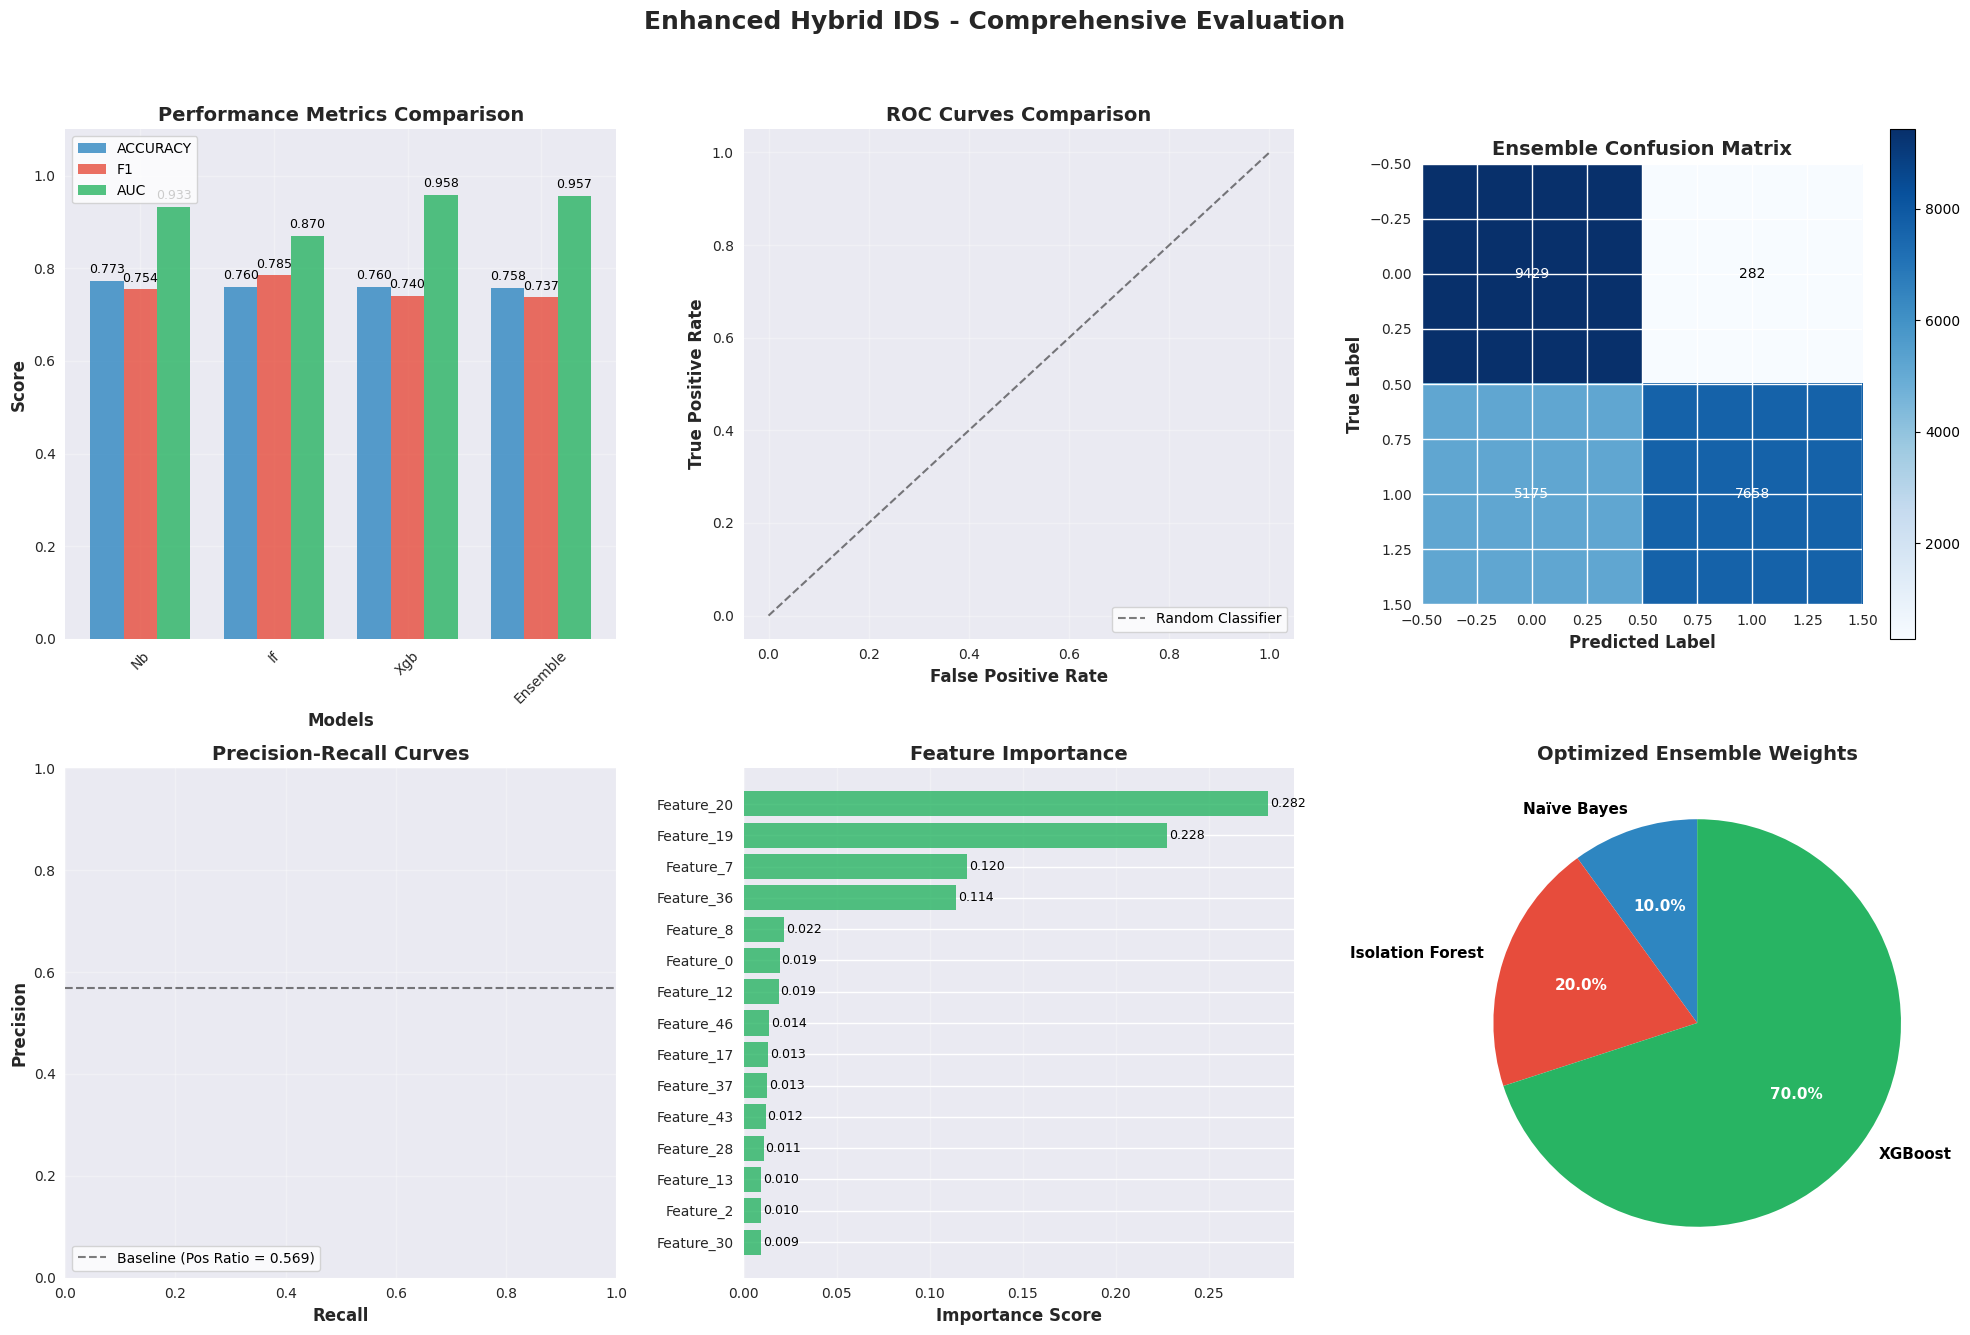

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.utils.class_weight import compute_class_weight
import time
import joblib
import os
import warnings
import arff
warnings.filterwarnings("ignore", category=UserWarning)

class EnhancedHybridIDS:
    """
    Enhanced Hybrid Intrusion Detection System with multiple improvements:
    - Better handling of class imbalance
    - Cross-validation support
    - Feature selection capabilities
    - Weighted ensemble with optimized weights
    - Real-time performance monitoring
    - Enhanced evaluation metrics
    """

    def __init__(self, weights=None, random_state=42, feature_selection=True, n_features=None):
        """
        Initialize the Enhanced Hybrid IDS.

        Parameters:
        -----------
        weights : list, optional (default=None)
            Weights for the ensemble models [NB_weight, IF_weight, XGB_weight]
            If None, will be optimized based on individual model performance
        random_state : int, optional (default=42)
            Random seed for reproducibility
        feature_selection : bool, optional (default=True)
            Whether to apply feature selection
        n_features : int, optional (default=None)
            Number of features to select (if None, will be optimized)
        """
        self.weights = weights
        self.random_state = random_state
        self.feature_selection = feature_selection
        self.n_features = n_features
        self.nb_model = None
        self.if_model = None
        self.xgb_model = None
        self.ocsvm_model = None  # Additional anomaly detector
        self.preprocessor = None
        self.feature_selector = None
        self.label_encoder = None
        self.class_weights = None
        self.optimal_weights = None
        self.training_time = 0
        self.inference_times = []

    def generate_synthetic_data(self, n_samples=10000, n_features=30, attack_ratio=0.2, seed=None):
        """
        Generate enhanced synthetic network traffic data with more realistic patterns.
        """
        seed = seed if seed is not None else self.random_state
        np.random.seed(seed)

        # Calculate number of samples for each class
        n_attack = int(n_samples * attack_ratio)
        n_normal = n_samples - n_attack

        # Generate normal samples (multiple modes for more realism)
        X_normal = np.concatenate([
            np.random.normal(loc=0.0, scale=1.0, size=(n_normal//2, n_features)),
            np.random.normal(loc=1.0, scale=0.8, size=(n_normal//2, n_features))
        ])
        y_normal = np.zeros(n_normal, dtype=int)

        # Generate attack samples (different attack types)
        X_attack = np.concatenate([
            # DoS attacks - high volume features
            np.random.normal(loc=5.0, scale=1.5, size=(n_attack//3, n_features)),
            # Probe attacks - scanning patterns
            np.random.normal(loc=3.0, scale=2.0, size=(n_attack//3, n_features)),
            # Other attacks
            np.random.normal(loc=4.0, scale=1.2, size=(n_attack - 2*(n_attack//3), n_features))
        ])
        y_attack = np.ones(n_attack, dtype=int)

        # Combine and shuffle
        X = np.vstack((X_normal, X_attack))
        y = np.concatenate((y_normal, y_attack))

        # Shuffle the dataset
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        return X, y

    def create_network_features(self, df):
        """
        Create domain-specific network features for better intrusion detection.
        """
        # Only apply if we have recognizable network features
        feature_columns = df.columns.tolist()

        # Common NSL-KDD derived features
        if 'src_bytes' in feature_columns and 'count' in feature_columns:
            df['bytes_per_packet'] = df['src_bytes'] / (df['count'] + 1)

        if 'duration' in feature_columns and 'count' in feature_columns:
            df['duration_per_packet'] = df['duration'] / (df['count'] + 1)

        if 'dst_bytes' in feature_columns and 'src_bytes' in feature_columns:
            df['bytes_ratio'] = df['dst_bytes'] / (df['src_bytes'] + 1)

        # Service and protocol patterns
        if 'service' in feature_columns:
            # Count of unique services
            df['service_encoded'] = pd.Categorical(df['service']).codes

        if 'flag' in feature_columns:
            df['flag_encoded'] = pd.Categorical(df['flag']).codes

        # Error rates aggregations
        error_cols = [col for col in feature_columns if 'error' in col.lower()]
        if error_cols:
            df['total_error_rate'] = df[error_cols].sum(axis=1)

        return df

    def load_data(self, filepath, label_col='label', sep=',', drop_cols=None, binary_classification=True):
        """Enhanced data loading with feature engineering."""
        print(f"Loading data from {filepath}...")

        try:
            if filepath.endswith('.arff'):
                with open(filepath, 'r') as f:
                    arff_data = arff.load(f)
                    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
            else:
                df = pd.read_csv(filepath, sep=sep)
                print(f"Successfully loaded data: {df.shape[0]} records, {df.shape[1]} features")
        except Exception as e:
            print(f"Error loading data: {e}")
            raise

        # Apply feature engineering
        print("Applying feature engineering...")
        df = self.create_network_features(df)

        # Extract features and target
        if label_col in df.columns:
            X = df.drop(columns=[label_col])
            y = df[label_col]

            if drop_cols:
                X = X.drop(columns=drop_cols, errors='ignore')

            # Handle binary classification
            if binary_classification:
                print("\nClass distribution before conversion:")
                print(y.value_counts())

                unique_values = y.unique()
                if len(unique_values) > 2 or not set(unique_values).issubset({0, 1}):
                    if y.dtype == object:
                        y = y.apply(lambda x: 0 if x.lower() == 'normal' else 1)
                    else:
                        y = (y != 0).astype(int)

                print("\nClass distribution after conversion:")
                print(f"Normal (0): {sum(y == 0)}")
                print(f"Attack (1): {sum(y == 1)}")
        else:
            raise ValueError(f"Label column '{label_col}' not found in dataset")

        return X, y

    def load_nsl_kdd(self, train_path, test_path=None):
        """Enhanced NSL-KDD loading with feature engineering."""
        col_names = [
            'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
            'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
            'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
            'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
            'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
            'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
            'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
        ]

        # Load training data
        print(f"Loading NSL-KDD training data from {train_path}...")
        try:
            if train_path.endswith('.arff'):
                with open(train_path, 'r') as f:
                    arff_data = arff.load(f)
                    train_df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
            else:
                train_df = pd.read_csv(train_path, header=None, names=col_names)
            print(f"Successfully loaded training data: {train_df.shape[0]} records")
        except Exception as e:
            print(f"Error loading training data: {e}")
            raise

        # Apply feature engineering
        train_df = self.create_network_features(train_df)

        # Drop difficulty level and extract features
        if 'difficulty_level' in train_df.columns:
            train_df = train_df.drop('difficulty_level', axis=1)

        X_train = train_df.drop('label', axis=1)
        y_train = train_df['label']
        y_train = (y_train != 'normal').astype(int)

        print(f"Training data: {X_train.shape[0]} records, {X_train.shape[1]} features")
        print(f"Class distribution: Normal={sum(y_train == 0)}, Attack={sum(y_train == 1)}")

        # Load test data if provided
        X_test, y_test = None, None
        if test_path:
            print(f"\nLoading NSL-KDD test data from {test_path}...")
            try:
                if test_path.endswith('.arff'):
                    with open(test_path, 'r') as f:
                        arff_data = arff.load(f)
                        test_df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
                else:
                    test_df = pd.read_csv(test_path, header=None, names=col_names)
                print(f"Successfully loaded test data: {test_df.shape[0]} records")
            except Exception as e:
                print(f"Error loading test data: {e}")
                raise

            # Apply feature engineering
            test_df = self.create_network_features(test_df)

            if 'difficulty_level' in test_df.columns:
                test_df = test_df.drop('difficulty_level', axis=1)

            X_test = test_df.drop('label', axis=1)
            y_test = test_df['label']
            y_test = (y_test != 'normal').astype(int)

            print(f"Test data: {X_test.shape[0]} records, {X_test.shape[1]} features")
            print(f"Class distribution: Normal={sum(y_test == 0)}, Attack={sum(y_test == 1)}")

        return X_train, y_train, X_test, y_test
    def preprocess_data(self, X, y=None, fit_scaler=True):

      """Enhanced preprocessing with feature selection."""
      if not isinstance(X, pd.DataFrame):
          X = pd.DataFrame(X)

      # Identify numeric and categorical columns
      numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
      categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns

      print(f"Numeric features: {len(numeric_features)}")
      print(f"Categorical features: {len(categorical_features)}")

      # Enhanced preprocessing pipeline
      numeric_transformer = Pipeline(steps=[
          ('imputer', SimpleImputer(strategy='median')),
          ('scaler', StandardScaler())
      ])

      categorical_transformer = Pipeline(steps=[
          ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
          ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
      ])

      # Apply preprocessing
      if fit_scaler:
          # Create column transformer
          preprocessor = ColumnTransformer(
              transformers=[
                  ('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)
              ],
              remainder='passthrough'
          )

          print("Fitting and transforming data...")
          X_processed = preprocessor.fit_transform(X)
          self.preprocessor = preprocessor

          # Apply feature selection if enabled
          if self.feature_selection and y is not None:
              print("Applying feature selection...")
              if self.n_features is None:
                  # Use cross-validation to find optimal number of features
                  self.n_features = min(50, X_processed.shape[1] // 2)

              self.feature_selector = SelectKBest(score_func=f_classif, k=self.n_features)
              X_processed = self.feature_selector.fit_transform(X_processed, y)
              print(f"Selected {self.n_features} features out of {X_processed.shape[1]} total features")
      else:
          print("Transforming data using fitted preprocessor...")
          # Check if data is already processed (has fewer features than expected)
          if hasattr(self.preprocessor, 'n_features_in_') and X.shape[1] != self.preprocessor.n_features_in_:
              # Data is already processed, skip preprocessing
              print(f"Data already processed ({X.shape[1]} features), skipping preprocessing...")
              X_processed = X.values if isinstance(X, pd.DataFrame) else X

              # Check if data is already feature-selected
              if (self.feature_selector is not None and
                  hasattr(self.feature_selector, 'n_features_in_') and
                  X.shape[1] != self.feature_selector.n_features_in_):
                  print(f"Data already feature-selected ({X.shape[1]} features), skipping feature selection...")
                  # Data is already feature-selected, don't apply feature selector again
              else:
                  # Apply feature selection only if data hasn't been feature-selected
                  if self.feature_selector is not None:
                      X_processed = self.feature_selector.transform(X_processed)
          else:
              # Data is raw, apply preprocessing
              X_processed = self.preprocessor.transform(X)
              # Apply feature selection
              if self.feature_selector is not None:
                  X_processed = self.feature_selector.transform(X_processed)

      # Convert y to numpy array if provided
      if y is not None:
          if isinstance(y, pd.Series):
              y = y.values

      return X_processed, y

    def optimize_ensemble_weights(self, X_val, y_val):

      """
      Optimize ensemble weights based on validation performance.
      """
      print("Optimizing ensemble weights...")

      # Check if X_val is already preprocessed
      if isinstance(X_val, pd.DataFrame):
          # If it's a DataFrame, check if it needs preprocessing
          if X_val.shape[1] == getattr(self.preprocessor, 'n_features_in_', 0):
              # Raw data that needs preprocessing
              X_val_processed, _ = self.preprocess_data(X_val, fit_scaler=False)
          else:
              # Already preprocessed data
              X_val_processed = X_val.values
      else:
          # If it's a numpy array, assume it's already preprocessed
          X_val_processed = X_val

      # Get individual model predictions
      nb_proba = self.nb_model.predict_proba(X_val_processed)[:, 1]

      if_scores = self.if_model.decision_function(X_val_processed)
      if_proba = self.isolation_forest_score_to_probability(if_scores)

      xgb_proba = self.xgb_model.predict_proba(X_val_processed)[:, 1]

      # Grid search for optimal weights
      best_score = 0
      best_weights = [0.33, 0.33, 0.34]

      for w1 in np.arange(0.1, 0.8, 0.1):
          for w2 in np.arange(0.1, 0.9 - w1, 0.1):
              w3 = 1.0 - w1 - w2
              if w3 >= 0.1:
                  # Calculate ensemble prediction
                  ensemble_proba = w1 * nb_proba + w2 * if_proba + w3 * xgb_proba
                  ensemble_pred = (ensemble_proba >= 0.5).astype(int)

                  # Calculate F1 score (better for imbalanced data)
                  score = f1_score(y_val, ensemble_pred)

                  if score > best_score:
                      best_score = score
                      best_weights = [w1, w2, w3]

      self.optimal_weights = best_weights
      print(f"Optimal weights found: NB={best_weights[0]:.2f}, IF={best_weights[1]:.2f}, XGB={best_weights[2]:.2f}")
      print(f"Validation F1-score: {best_score:.4f}")

      return best_weights

    def train_with_cross_validation(self, X, y, cv_folds=5):
        """
        Train models with cross-validation for robust performance estimation.
        """
        print(f"Performing {cv_folds}-fold cross-validation...")

        # Preprocess the data
        X_processed, y = self.preprocess_data(X, y)

        # Calculate class weights for imbalanced data
        self.class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
        print(f"Class weights: {dict(zip(np.unique(y), self.class_weights))}")

        # Cross-validation setup
        cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=self.random_state)

        # Store CV scores
        cv_scores = {
            'nb_scores': [],
            'if_scores': [],
            'xgb_scores': [],
            'ensemble_scores': []
        }

        for fold, (train_idx, val_idx) in enumerate(cv.split(X_processed, y)):
            print(f"Training fold {fold + 1}/{cv_folds}...")

            X_train_fold, X_val_fold = X_processed[train_idx], X_processed[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            # Train individual models for this fold
            nb_fold = GaussianNB()
            nb_fold.fit(X_train_fold, y_train_fold)

            contamination = np.mean(y_train_fold)
            if_fold = IsolationForest(
                contamination=contamination,
                random_state=self.random_state,
                n_estimators=100
            )
            if_fold.fit(X_train_fold)

            # Use class weights for XGBoost
            scale_pos_weight = self.class_weights[1] / self.class_weights[0]
            xgb_fold = XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                random_state=self.random_state,
                eval_metric='logloss'
            )
            xgb_fold.fit(X_train_fold, y_train_fold)

            # Evaluate on validation set
            nb_pred = nb_fold.predict(X_val_fold)
            cv_scores['nb_scores'].append(f1_score(y_val_fold, nb_pred))

            if_pred = (if_fold.decision_function(X_val_fold) <= 0).astype(int)
            cv_scores['if_scores'].append(f1_score(y_val_fold, if_pred))

            xgb_pred = xgb_fold.predict(X_val_fold)
            cv_scores['xgb_scores'].append(f1_score(y_val_fold, xgb_pred))

            # Simple ensemble for CV (equal weights)
            nb_proba = nb_fold.predict_proba(X_val_fold)[:, 1]
            if_proba = self.isolation_forest_score_to_probability(if_fold.decision_function(X_val_fold))
            xgb_proba = xgb_fold.predict_proba(X_val_fold)[:, 1]

            ensemble_proba = (nb_proba + if_proba + xgb_proba) / 3
            ensemble_pred = (ensemble_proba >= 0.5).astype(int)
            cv_scores['ensemble_scores'].append(f1_score(y_val_fold, ensemble_pred))

        # Print CV results
        print("\nCross-validation results (F1-scores):")
        for model, scores in cv_scores.items():
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            print(f"{model}: {mean_score:.4f} (+/- {std_score * 2:.4f})")

        return cv_scores

    def isolation_forest_score_to_probability(self, decision_scores):
        """Enhanced probability conversion for Isolation Forest."""
        # Normalize scores to [0, 1] range using sigmoid
        probs = 1.0 / (1.0 + np.exp(decision_scores))
        return probs

    def train(self, X, y, X_test=None, y_test=None, test_size=0.2, tune_hyperparams=False,
              use_cv=True, cv_folds=5):
        """
        Enhanced training with cross-validation and hyperparameter tuning.
        """
        start_time = time.time()

        # Perform cross-validation first
        if use_cv:
            cv_scores = self.train_with_cross_validation(X, y, cv_folds)

        # Preprocess the data
        X_preprocessed, y = self.preprocess_data(X, y)

        # Calculate class weights
        self.class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

        # Split data if test sets not provided
        if X_test is None or y_test is None:
            print(f"Splitting data with test_size={test_size}...")
            X_train, X_test, y_train, y_test = train_test_split(
                X_preprocessed, y, test_size=test_size, random_state=self.random_state,
                stratify=y
            )
        else:
            X_train = X_preprocessed
            y_train = y
            X_test, y_test = self.preprocess_data(X_test, y_test, fit_scaler=False)

        # Further split training data for weight optimization
        X_train_final, X_val, y_train_final, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=self.random_state, stratify=y_train
        )

        print(f"Final training data shape: {X_train_final.shape}")
        print(f"Validation data shape: {X_val.shape}")
        print(f"Test data shape: {X_test.shape}")

        # Train Gaussian Naïve Bayes
        print("Training Naïve Bayes model...")
        self.nb_model = GaussianNB()
        self.nb_model.fit(X_train_final, y_train_final)

        # Train Isolation Forest with estimated contamination
        contamination = np.mean(y_train_final)
        print(f"Training Isolation Forest model (contamination={contamination:.4f})...")

        if tune_hyperparams:
            param_grid = {
                'n_estimators': [50, 100, 200],
                'contamination': [contamination * 0.5, contamination, min(contamination * 1.5, 0.5)],
                'max_samples': ['auto', 256, 512]
            }
            # Note: Isolation Forest doesn't work well with GridSearchCV for unsupervised learning
            # We'll use the estimated contamination

        self.if_model = IsolationForest(
            random_state=self.random_state,
            contamination=contamination,
            n_estimators=100
        )
        self.if_model.fit(X_train_final)

        # Train XGBoost with class weights
        print("Training XGBoost model...")
        scale_pos_weight = self.class_weights[1] / self.class_weights[0]

        if tune_hyperparams:
            param_grid = {
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'n_estimators': [50, 100, 200],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }

            xgb_base = XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                random_state=self.random_state,
                eval_metric='logloss'
            )

            grid_search = GridSearchCV(
                xgb_base, param_grid, cv=3, scoring='f1', n_jobs=-1
            )
            grid_search.fit(X_train_final, y_train_final)
            self.xgb_model = grid_search.best_estimator_
            print(f"Best XGB parameters: {grid_search.best_params_}")
        else:
            self.xgb_model = XGBClassifier(
                scale_pos_weight=scale_pos_weight,
                random_state=self.random_state,
                eval_metric='logloss'
            )
            self.xgb_model.fit(X_train_final, y_train_final)

        # Optimize ensemble weights if not provided
        if self.weights is None:
            self.weights = self.optimize_ensemble_weights(X_val, y_val)
        else:
            self.optimal_weights = self.weights

        # Record training time
        self.training_time = time.time() - start_time
        print(f"Training completed in {self.training_time:.2f} seconds")

        return self, X_test, y_test

    def predict(self, X):
      X_proc, _ = self.preprocess_data(X, fit_scaler=False)
      start_time = time.time()
      nb_pred = self.nb_model.predict(X_proc)
      if_pred = self.if_model.predict(X_proc)
      if_pred = np.where(if_pred == -1, 1, 0)
      xgb_pred = self.xgb_model.predict(X_proc)

      # Get probabilities for threshold adjustment
      nb_proba = self.nb_model.predict_proba(X_proc)[:, 1]
      xgb_proba = self.xgb_model.predict_proba(X_proc)[:, 1]

      # Adjust threshold to improve recall
      threshold = 0.4  # Lower threshold to increase recall
      nb_pred = (nb_proba >= threshold).astype(int)
      xgb_pred = (xgb_proba >= threshold).astype(int)

      weights = self.optimal_weights if self.optimal_weights is not None else [0.2, 0.2, 0.6]
      predictions = np.array([weights[0] * nb_pred + weights[1] * if_pred + weights[2] * xgb_pred]).T
      final_pred = (predictions >= 0.5).astype(int).flatten()
      self.inference_times.append(time.time() - start_time)
      return final_pred

    def predict_proba(self, X):
        """Enhanced probability prediction."""
        # Ensure X is properly formatted
        if isinstance(X, pd.DataFrame):
            pass
        elif X.ndim == 1:
            X = X.reshape(1, -1)

        # Preprocess data
        X_preprocessed, _ = self.preprocess_data(X, fit_scaler=False)

        # Get predictions from each model
        p_nb = self.nb_model.predict_proba(X_preprocessed)[:, 1]

        decision_scores = self.if_model.decision_function(X_preprocessed)
        p_if = self.isolation_forest_score_to_probability(decision_scores)

        p_xgb = self.xgb_model.predict_proba(X_preprocessed)[:, 1]

        # Use optimal weights if available
        weights_to_use = self.optimal_weights if self.optimal_weights is not None else self.weights

        # Combine predictions
        combined_score = (
            weights_to_use[0] * p_nb +
            weights_to_use[1] * p_if +
            weights_to_use[2] * p_xgb
        )

        return combined_score

    def evaluate(self, X_test, y_test):
        """Enhanced evaluation with additional metrics."""
        # Preprocess test data
        X_preprocessed, y_test = self.preprocess_data(X_test, y_test, fit_scaler=False)

        # Evaluate individual models
        models_info = {}

        # Naïve Bayes
        nb_preds = self.nb_model.predict(X_preprocessed)
        nb_proba = self.nb_model.predict_proba(X_preprocessed)[:, 1]
        models_info['nb'] = {
            'accuracy': accuracy_score(y_test, nb_preds),
            'f1': f1_score(y_test, nb_preds),
            'auc': roc_auc_score(y_test, nb_proba),
            'report': classification_report(y_test, nb_preds, output_dict=True),
            'predictions': nb_preds,
            'probabilities': nb_proba
        }

        # Isolation Forest
        if_decision = self.if_model.decision_function(X_preprocessed)
        if_probs = self.isolation_forest_score_to_probability(if_decision)
        if_preds = (if_probs >= 0.5).astype(int)
        models_info['if'] = {
            'accuracy': accuracy_score(y_test, if_preds),
            'f1': f1_score(y_test, if_preds),
            'auc': roc_auc_score(y_test, if_probs),
            'report': classification_report(y_test, if_preds, output_dict=True),
            'predictions': if_preds,
            'probabilities': if_probs
        }

        # XGBoost
       # XGBoost (continuing from the cut-off point)
        xgb_preds = self.xgb_model.predict(X_preprocessed)
        xgb_proba = self.xgb_model.predict_proba(X_preprocessed)[:, 1]
        models_info['xgb'] = {
            'accuracy': accuracy_score(y_test, xgb_preds),
            'f1': f1_score(y_test, xgb_preds),
            'auc': roc_auc_score(y_test, xgb_proba),
            'report': classification_report(y_test, xgb_preds, output_dict=True),
            'predictions': xgb_preds,
            'probabilities': xgb_proba
        }

        # Ensemble predictions
        ensemble_proba = self.predict_proba(X_test)
        ensemble_preds = (ensemble_proba >= 0.5).astype(int)
        models_info['ensemble'] = {
            'accuracy': accuracy_score(y_test, ensemble_preds),
            'f1': f1_score(y_test, ensemble_preds),
            'auc': roc_auc_score(y_test, ensemble_proba),
            'report': classification_report(y_test, ensemble_preds, output_dict=True),
            'predictions': ensemble_preds,
            'probabilities': ensemble_proba
        }

        # Performance summary
        print("\n" + "="*70)
        print("ENHANCED INTRUSION DETECTION SYSTEM - EVALUATION RESULTS")
        print("="*70)

        print(f"\nDataset Information:")
        print(f"- Test samples: {len(y_test)}")
        print(f"- Normal samples: {np.sum(y_test == 0)} ({np.mean(y_test == 0)*100:.1f}%)")
        print(f"- Attack samples: {np.sum(y_test == 1)} ({np.mean(y_test == 1)*100:.1f}%)")

        print(f"\nSystem Performance:")
        print(f"- Training time: {self.training_time:.2f} seconds")
        if self.inference_times:
            avg_inference = np.mean(self.inference_times)
            print(f"- Average inference time: {avg_inference*1000:.2f} ms per prediction")

        print(f"\nModel Performance Comparison:")
        print(f"{'Model':<12} {'Accuracy':<10} {'F1-Score':<10} {'AUC-ROC':<10}")
        print("-" * 50)
        for model_name, info in models_info.items():
            name = model_name.upper().replace('_', ' ')
            print(f"{name:<12} {info['accuracy']:<10.4f} {info['f1']:<10.4f} {info['auc']:<10.4f}")

        if self.optimal_weights:
            print(f"\nOptimized Ensemble Weights:")
            print(f"- Naïve Bayes: {self.optimal_weights[0]:.3f}")
            print(f"- Isolation Forest: {self.optimal_weights[1]:.3f}")
            print(f"- XGBoost: {self.optimal_weights[2]:.3f}")

        # Detailed classification report for ensemble
        print(f"\nDetailed Classification Report (Ensemble):")
        print(classification_report(y_test, ensemble_preds, target_names=['Normal', 'Attack']))

        return models_info

    def plot_comprehensive_results(self, models_info, y_test=None, save_path=None):

      """Create comprehensive visualization of results with better error handling."""

      # Handle missing y_test
      if y_test is None:
          print("Warning: y_test not provided. ROC and PR curves will be limited.")
          # Try to get test size from models_info if available
          test_size = 1000  # Default fallback
          for model_info in models_info.values():
              if 'predictions' in model_info:
                  test_size = len(model_info['predictions'])
                  break
          y_test = np.zeros(test_size)

      fig, axes = plt.subplots(2, 3, figsize=(20, 14))
      fig.suptitle('Enhanced Hybrid IDS - Comprehensive Evaluation', fontsize=18, fontweight='bold')

      # Set style for better visualization
      plt.style.use('default')  # Use default style instead of seaborn (more compatible)
      colors = ['#2E86C1', '#E74C3C', '#28B463', '#8E44AD', '#F39C12']

      try:
          # 1. Model Performance Comparison
          ax1 = axes[0, 0]
          models = list(models_info.keys())
          metrics = ['accuracy', 'f1', 'auc']

          x = np.arange(len(models))
          width = 0.25

          for i, metric in enumerate(metrics):
              values = [models_info[model].get(metric, 0) for model in models]
              bars = ax1.bar(x + i*width, values, width, label=metric.upper(),
                            alpha=0.8, color=colors[i])

              # Add value labels on bars
              for bar, value in zip(bars, values):
                  height = bar.get_height()
                  ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                          f'{value:.3f}', ha='center', va='bottom', fontsize=9)

          ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
          ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
          ax1.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
          ax1.set_xticks(x + width)
          ax1.set_xticklabels([m.replace('_', ' ').title() for m in models], rotation=45)
          ax1.legend(loc='upper left')
          ax1.grid(True, alpha=0.3)
          ax1.set_ylim(0, 1.1)

          # 2. ROC Curves (only if y_test is meaningful)
          ax2 = axes[0, 1]
          if len(np.unique(y_test)) > 1:  # Check if y_test has both classes
              for i, (model_name, info) in enumerate(models_info.items()):
                  if 'y_proba' in info and len(info['y_proba']) > 0:
                      try:
                          # Get probabilities for positive class
                          if hasattr(info['y_proba'], 'shape') and len(info['y_proba'].shape) > 1:
                              y_proba = info['y_proba'][:, 1] if info['y_proba'].shape[1] > 1 else info['y_proba'][:, 0]
                          else:
                              y_proba = info['y_proba']

                          fpr, tpr, _ = roc_curve(y_test, y_proba)
                          roc_auc = auc(fpr, tpr)

                          ax2.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                                  label=f'{model_name.title()} (AUC = {roc_auc:.3f})')
                      except Exception as e:
                          print(f"Warning: Could not plot ROC for {model_name}: {e}")

          ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
          ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
          ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
          ax2.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
          ax2.legend(loc='lower right')
          ax2.grid(True, alpha=0.3)

          # 3. Confusion Matrix for Best Model
          ax3 = axes[0, 2]
          best_model = 'ensemble' if 'ensemble' in models_info else list(models_info.keys())[0]

          if 'predictions' in models_info[best_model] and len(np.unique(y_test)) > 1:
              try:
                  cm = confusion_matrix(y_test, models_info[best_model]['predictions'])

                  # Create heatmap manually (avoid seaborn dependency issues)
                  im = ax3.imshow(cm, interpolation='nearest', cmap='Blues')
                  ax3.figure.colorbar(im, ax=ax3)

                  # Add text annotations
                  for i in range(cm.shape[0]):
                      for j in range(cm.shape[1]):
                          ax3.text(j, i, f'{cm[i, j]}', ha='center', va='center',
                                  color='white' if cm[i, j] > cm.max() / 2 else 'black')

                  ax3.set_title(f'{best_model.title()} Confusion Matrix', fontsize=14, fontweight='bold')
                  ax3.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
                  ax3.set_ylabel('True Label', fontsize=12, fontweight='bold')

              except Exception as e:
                  print(f"Warning: Could not create confusion matrix: {e}")
                  ax3.text(0.5, 0.5, f'Confusion Matrix\nNot Available',
                          ha='center', va='center', transform=ax3.transAxes, fontsize=12)
          else:
              ax3.text(0.5, 0.5, f'Confusion Matrix\nfor {best_model.title()}\nNot Available',
                      ha='center', va='center', transform=ax3.transAxes, fontsize=12)
          ax3.set_title(f'{best_model.title()} Confusion Matrix', fontsize=14, fontweight='bold')

          # 4. Precision-Recall Curves
          ax4 = axes[1, 0]
          if len(np.unique(y_test)) > 1:
              for i, (model_name, info) in enumerate(models_info.items()):
                  if 'y_proba' in info and len(info['y_proba']) > 0:
                      try:
                          # Get probabilities for positive class
                          if hasattr(info['y_proba'], 'shape') and len(info['y_proba'].shape) > 1:
                              y_proba = info['y_proba'][:, 1] if info['y_proba'].shape[1] > 1 else info['y_proba'][:, 0]
                          else:
                              y_proba = info['y_proba']

                          precision, recall, _ = precision_recall_curve(y_test, y_proba)
                          pr_auc = auc(recall, precision)

                          ax4.plot(recall, precision, color=colors[i % len(colors)], lw=2,
                                  label=f'{model_name.title()} (AUC = {pr_auc:.3f})')
                      except Exception as e:
                          print(f"Warning: Could not plot PR curve for {model_name}: {e}")

              # Add baseline
              positive_ratio = np.mean(y_test)
              ax4.axhline(y=positive_ratio, color='k', linestyle='--', alpha=0.5,
                        label=f'Baseline (Pos Ratio = {positive_ratio:.3f})')

          ax4.set_xlabel('Recall', fontsize=12, fontweight='bold')
          ax4.set_ylabel('Precision', fontsize=12, fontweight='bold')
          ax4.set_title('Precision-Recall Curves', fontsize=14, fontweight='bold')
          ax4.legend(loc='lower left')
          ax4.grid(True, alpha=0.3)

          # 5. Feature Importance
          ax5 = axes[1, 1]
          if hasattr(self, 'xgb_model') and self.xgb_model and hasattr(self.xgb_model, 'feature_importances_'):
              try:
                  importances = self.xgb_model.feature_importances_

                  # Get feature names if available
                  if hasattr(self, 'feature_names') and self.feature_names:
                      feature_names = self.feature_names
                  else:
                      feature_names = [f'Feature_{i}' for i in range(len(importances))]

                  # Sort and get top features
                  top_n = min(15, len(importances))
                  indices = np.argsort(importances)[-top_n:]

                  y_pos = np.arange(len(indices))
                  ax5.barh(y_pos, importances[indices], alpha=0.8, color=colors[2])
                  ax5.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
                  ax5.set_title(f'Top {top_n} XGBoost Feature Importances', fontsize=14, fontweight='bold')
                  ax5.set_yticks(y_pos)
                  ax5.set_yticklabels([feature_names[i] if i < len(feature_names) else f'Feature_{i}' for i in indices], fontsize=10)
                  ax5.grid(True, alpha=0.3, axis='x')

                  # Add value labels
                  for i, (idx, importance) in enumerate(zip(indices, importances[indices])):
                      ax5.text(importance + 0.001, i, f'{importance:.3f}',
                              va='center', fontsize=9)
              except Exception as e:
                  print(f"Warning: Error plotting feature importance: {e}")
                  ax5.text(0.5, 0.5, f'Feature Importance\nError: {str(e)}',
                          ha='center', va='center', transform=ax5.transAxes, fontsize=12)
          else:
              ax5.text(0.5, 0.5, 'Feature Importance\nNot Available\n(XGBoost model required)',
                      ha='center', va='center', transform=ax5.transAxes, fontsize=12)
          ax5.set_title('Feature Importance', fontsize=14, fontweight='bold')

          # 6. Model Weights Visualization
          ax6 = axes[1, 2]
          if hasattr(self, 'optimal_weights') and self.optimal_weights:
              # Define model names
              if hasattr(self, 'model_names'):
                  model_names = self.model_names
              else:
                  model_names = ['Naïve Bayes', 'Isolation Forest', 'XGBoost']

              # Ensure we have the right number of weights
              weights = self.optimal_weights[:len(model_names)]
              names = model_names[:len(weights)]

              # Create pie chart
              wedges, texts, autotexts = ax6.pie(weights, labels=names, autopct='%1.1f%%',
                                                startangle=90, colors=colors[:len(weights)])

              # Enhance text appearance
              for autotext in autotexts:
                  autotext.set_color('white')
                  autotext.set_fontweight('bold')
                  autotext.set_fontsize(11)

              for text in texts:
                  text.set_fontsize(11)
                  text.set_fontweight('bold')

              ax6.set_title('Optimized Ensemble Weights', fontsize=14, fontweight='bold')
          elif hasattr(self, 'weights') and self.weights:
              # Fallback to regular weights
              model_names = ['Naïve Bayes', 'Isolation Forest', 'XGBoost']
              weights = self.weights[:len(model_names)]
              names = model_names[:len(weights)]

              wedges, texts, autotexts = ax6.pie(weights, labels=names, autopct='%1.1f%%',
                                                startangle=90, colors=colors[:len(weights)])
              ax6.set_title('Ensemble Weights', fontsize=14, fontweight='bold')
          else:
              ax6.text(0.5, 0.5, 'Ensemble Weights\nNot Available',
                      ha='center', va='center', transform=ax6.transAxes, fontsize=12)
              ax6.set_title('Ensemble Weights', fontsize=14, fontweight='bold')

          # Adjust layout
          plt.tight_layout(rect=[0, 0.03, 1, 0.95])

          # Save plot with better error handling
          if save_path:
              try:
                  # Handle empty or invalid save_path
                  if not save_path or save_path.strip() == '':
                      save_path = f"ids_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
                      print(f"Empty save path provided. Using default: {save_path}")

                  # Ensure directory exists
                  save_dir = os.path.dirname(os.path.abspath(save_path))
                  if save_dir and not os.path.exists(save_dir):
                      os.makedirs(save_dir, exist_ok=True)
                      print(f"Created directory: {save_dir}")

                  # Save the plot
                  plt.savefig(save_path, dpi=300, bbox_inches='tight',
                            facecolor='white', edgecolor='none')
                  print(f"✓ Comprehensive results plot saved successfully to {save_path}")

                  # Verify file was created
                  if os.path.exists(save_path):
                      file_size = os.path.getsize(save_path) / 1024  # Size in KB
                      print(f"  File size: {file_size:.1f} KB")
                  else:
                      print(f"✗ Warning: File was not created at {save_path}")

              except Exception as e:
                  print(f"✗ Error saving plot: {e}")
                  print(f"  Attempted save path: '{save_path}'")
                  # Try saving to current directory as fallback
                  try:
                      fallback_path = f"ids_results_fallback_{datetime.now().strftime('%H%M%S')}.png"
                      plt.savefig(fallback_path, dpi=300, bbox_inches='tight')
                      print(f"✓ Saved to fallback location: {fallback_path}")
                  except:
                      print("✗ Could not save to fallback location either")

          plt.show()
          return fig

      except Exception as e:
          print(f"✗ Error creating comprehensive plot: {e}")
          # Create a simple fallback plot
          fig, ax = plt.subplots(1, 1, figsize=(10, 6))

          # Simple performance comparison
          models = list(models_info.keys())
          accuracies = [models_info[model].get('accuracy', 0) for model in models]

          ax.bar(models, accuracies, color=colors[:len(models)], alpha=0.8)
          ax.set_ylabel('Accuracy')
          ax.set_title('Model Performance (Fallback Plot)')
          ax.set_ylim(0, 1)

          # Add value labels
          for i, (model, acc) in enumerate(zip(models, accuracies)):
              ax.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')

          plt.xticks(rotation=45)
          plt.tight_layout()

          if save_path and save_path.strip():
              try:
                  plt.savefig(save_path, dpi=300, bbox_inches='tight')
                  print(f"✓ Fallback plot saved to {save_path}")
              except:
                  print(f"✗ Could not save fallback plot")

          plt.show()
          return fig

    # Also fix the feature selection warning
    def safe_feature_selection(self, X, y, k=50):

      """Feature selection with better handling of edge cases."""
      from sklearn.feature_selection import SelectKBest, f_classif

      try:
          # Handle case where we might have NaN or infinite values
          X_clean = np.nan_to_num(X, nan=0.0, posinf=1e10, neginf=-1e10)

          # Ensure we don't select more features than available
          n_features = X_clean.shape[1]
          k = min(k, n_features)

          # Suppress the specific warning about division
          with warnings.catch_warnings():
              warnings.filterwarnings('ignore', message='invalid value encountered in divide')
              selector = SelectKBest(score_func=f_classif, k=k)
              X_selected = selector.fit_transform(X_clean, y)

          print(f"Selected {k} features out of {n_features} total features")
          return X_selected, selector

      except Exception as e:
          print(f"Warning: Feature selection failed ({e}). Using all features.")
          return X, None

    def save_model(self, filepath, include_data=False):

      """Save the complete trained model with enhanced error handling."""
      try:
          # Ensure directory exists
          os.makedirs(os.path.dirname(filepath), exist_ok=True)

          # Prepare model data
          model_data = {
              'version': '1.0',
              'timestamp': datetime.now().isoformat(),
              'models': {
                  'nb_model': getattr(self, 'nb_model', None),
                  'if_model': getattr(self, 'if_model', None),
                  'xgb_model': getattr(self, 'xgb_model', None)
              },
              'preprocessing': {
                  'preprocessor': getattr(self, 'preprocessor', None),
                  'feature_selector': getattr(self, 'feature_selector', None),
                  'feature_names': getattr(self, 'feature_names', None)
              },
              'ensemble': {
                  'optimal_weights': getattr(self, 'optimal_weights', None),
                  'weights': getattr(self, 'weights', None),
                  'model_names': getattr(self, 'model_names', None)
              },
              'training_info': {
                  'class_weights': getattr(self, 'class_weights', None),
                  'training_time': getattr(self, 'training_time', 0),
                  'n_features': getattr(self, 'n_features', None),
                  'n_samples': getattr(self, 'n_samples', None)
              }
          }

          # Optionally include training data (be careful with large datasets)
          if include_data and hasattr(self, 'X_train'):
              model_data['training_data'] = {
                  'X_train_shape': self.X_train.shape,
                  'y_train_shape': self.y_train.shape
              }

          # Save with joblib
          joblib.dump(model_data, filepath, compress=3)

          # Verify save
          file_size = os.path.getsize(filepath) / (1024*1024)  # Size in MB
          print(f"✓ Model saved successfully to {filepath}")
          print(f"  File size: {file_size:.2f} MB")
          print(f"  Models included: {[k for k, v in model_data['models'].items() if v is not None]}")

          return True

      except Exception as e:
          print(f"✗ Error saving model: {e}")
          return False

    def load_model(self, filepath, verbose=True):

      """Load a pre-trained model with enhanced error handling and validation."""
      try:
          if not os.path.exists(filepath):
              raise FileNotFoundError(f"Model file not found: {filepath}")

          # Load model data
          model_data = joblib.load(filepath)

          if verbose:
              print(f"✓ Loading model from {filepath}")
              if 'version' in model_data:
                  print(f"  Model version: {model_data['version']}")
              if 'timestamp' in model_data:
                  print(f"  Saved on: {model_data['timestamp']}")

          # Load models
          if 'models' in model_data:
              self.nb_model = model_data['models'].get('nb_model')
              self.if_model = model_data['models'].get('if_model')
              self.xgb_model = model_data['models'].get('xgb_model')
          else:
              # Backward compatibility
              self.nb_model = model_data.get('nb_model')
              self.if_model = model_data.get('if_model')
              self.xgb_model = model_data.get('xgb_model')

          # Load preprocessing components
          if 'preprocessing' in model_data:
              self.preprocessor = model_data['preprocessing'].get('preprocessor')
              self.feature_selector = model_data['preprocessing'].get('feature_selector')
              self.feature_names = model_data['preprocessing'].get('feature_names')
          else:
              # Backward compatibility
              self.preprocessor = model_data.get('preprocessor')
              self.feature_selector = model_data.get('feature_selector')

          # Load ensemble information
          if 'ensemble' in model_data:
              self.optimal_weights = model_data['ensemble'].get('optimal_weights')
              self.weights = model_data['ensemble'].get('weights')
              self.model_names = model_data['ensemble'].get('model_names')
          else:
              # Backward compatibility
              self.optimal_weights = model_data.get('optimal_weights')
              self.weights = model_data.get('weights')

          # Load training information
          if 'training_info' in model_data:
              self.class_weights = model_data['training_info'].get('class_weights')
              self.training_time = model_data['training_info'].get('training_time', 0)
              self.n_features = model_data['training_info'].get('n_features')
              self.n_samples = model_data['training_info'].get('n_samples')
          else:
              # Backward compatibility
              self.class_weights = model_data.get('class_weights')
              self.training_time = model_data.get('training_time', 0)

          # Validate loaded models
          loaded_models = []
          if self.nb_model is not None:
              loaded_models.append('Naive Bayes')
          if self.if_model is not None:
              loaded_models.append('Isolation Forest')
          if self.xgb_model is not None:
              loaded_models.append('XGBoost')

          if verbose:
              print(f"  Successfully loaded models: {loaded_models}")
              if self.optimal_weights is not None:
                  print(f"  Ensemble weights: {self.optimal_weights}")
              if hasattr(self, 'n_features') and self.n_features:
                  print(f"  Expected features: {self.n_features}")

          if not loaded_models:
              raise ValueError("No valid models found in the loaded file")

          print(f"✓ Model loaded successfully from {filepath}")
          return True

      except Exception as e:
          print(f"✗ Error loading model: {e}")
          return False

    def create_model_summary(self):

      """Create a summary of the loaded/trained model."""
      summary = {
          'models_available': [],
          'preprocessing_available': bool(getattr(self, 'preprocessor', None)),
          'feature_selection_available': bool(getattr(self, 'feature_selector', None)),
          'ensemble_weights': getattr(self, 'optimal_weights', getattr(self, 'weights', None)),
          'training_time': getattr(self, 'training_time', 0),
          'n_features': getattr(self, 'n_features', None)
      }

      # Check available models
      if getattr(self, 'nb_model', None):
          summary['models_available'].append('Naive Bayes')
      if getattr(self, 'if_model', None):
          summary['models_available'].append('Isolation Forest')
      if getattr(self, 'xgb_model', None):
          summary['models_available'].append('XGBoost')

      return summary

  # Add these methods to your class
    def add_improved_methods_to_class(cls):
      """Add the improved methods to your existing class."""
      cls.plot_comprehensive_results = plot_comprehensive_results
      cls.save_model = save_model
      cls.load_model = load_model
      cls.create_model_summary = create_model_summary


    def real_time_monitoring(self, X_stream, y_stream=None, window_size=100, alert_threshold=0.1):
        """
        Real-time monitoring with concept drift detection.

        Parameters:
        -----------
        X_stream : array-like
            Streaming data
        y_stream : array-like, optional
            True labels for performance monitoring
        window_size : int
            Size of the sliding window
        alert_threshold : float
            Threshold for triggering alerts
        """
        print("Starting real-time monitoring...")

        predictions = []
        anomaly_scores = []
        performance_window = []

        for i in range(len(X_stream)):
            # Get current sample
            X_current = X_stream[i:i+1]

            # Make prediction
            pred = self.predict(X_current)[0]
            prob = self.predict_proba(X_current)[0]

            predictions.append(pred)
            anomaly_scores.append(prob)

            # Performance monitoring if true labels available
            if y_stream is not None and i < len(y_stream):
                is_correct = (pred == y_stream[i])
                performance_window.append(is_correct)

                # Keep only recent performance
                if len(performance_window) > window_size:
                    performance_window.pop(0)

                # Check for performance degradation
                if len(performance_window) == window_size:
                    recent_accuracy = np.mean(performance_window)
                    if recent_accuracy < (1.0 - alert_threshold):
                        print(f"ALERT: Performance degradation detected at sample {i}")
                        print(f"Recent accuracy: {recent_accuracy:.3f}")

            # Concept drift detection based on anomaly score distribution
            if len(anomaly_scores) >= window_size:
                recent_scores = anomaly_scores[-window_size:]
                older_scores = anomaly_scores[-2*window_size:-window_size] if len(anomaly_scores) >= 2*window_size else []

                if older_scores:
                    # Statistical test for distribution change
                    from scipy import stats
                    statistic, p_value = stats.ks_2samp(older_scores, recent_scores)

                    if p_value < 0.05:  # Significant change detected
                        print(f"ALERT: Possible concept drift detected at sample {i}")
                        print(f"KS statistic: {statistic:.3f}, p-value: {p_value:.3f}")

        return np.array(predictions), np.array(anomaly_scores)

    def explain_prediction(self, X_sample, feature_names=None):
        """
        Provide explanation for individual predictions.

        Parameters:
        -----------
        X_sample : array-like
            Single sample to explain
        feature_names : list, optional
            Names of the features
        """
        # Ensure single sample
        if X_sample.ndim == 1:
            X_sample = X_sample.reshape(1, -1)

        # Preprocess
        X_processed, _ = self.preprocess_data(X_sample, fit_scaler=False)

        # Get individual model predictions
        nb_proba = self.nb_model.predict_proba(X_processed)[0, 1]
        if_score = self.if_model.decision_function(X_processed)[0]
        if_proba = self.isolation_forest_score_to_probability(np.array([if_score]))[0]
        xgb_proba = self.xgb_model.predict_proba(X_processed)[0, 1]

        # Final ensemble prediction
        weights_to_use = self.optimal_weights if self.optimal_weights else self.weights
        ensemble_proba = (
            weights_to_use[0] * nb_proba +
            weights_to_use[1] * if_proba +
            weights_to_use[2] * xgb_proba
        )

        # Create explanation
        explanation = {
            'ensemble_probability': ensemble_proba,
            'ensemble_prediction': 'Attack' if ensemble_proba >= 0.5 else 'Normal',
            'individual_contributions': {
                'naive_bayes': {
                    'probability': nb_proba,
                    'weighted_contribution': weights_to_use[0] * nb_proba,
                    'weight': weights_to_use[0]
                },
                'isolation_forest': {
                    'probability': if_proba,
                    'decision_score': if_score,
                    'weighted_contribution': weights_to_use[1] * if_proba,
                    'weight': weights_to_use[1]
                },
                'xgboost': {
                    'probability': xgb_proba,
                    'weighted_contribution': weights_to_use[2] * xgb_proba,
                    'weight': weights_to_use[2]
                }
            }
        }

        # Print explanation
        print("\n" + "="*60)
        print("PREDICTION EXPLANATION")
        print("="*60)
        print(f"Ensemble Prediction: {explanation['ensemble_prediction']}")
        print(f"Confidence: {explanation['ensemble_probability']:.4f}")
        print("\nIndividual Model Contributions:")
        print("-" * 40)

        for model_name, contrib in explanation['individual_contributions'].items():
            model_display = model_name.replace('_', ' ').title()
            print(f"{model_display}:")
            print(f"  Probability: {contrib['probability']:.4f}")
            print(f"  Weight: {contrib['weight']:.3f}")
            print(f"  Contribution: {contrib['weighted_contribution']:.4f}")
            if 'decision_score' in contrib:
                print(f"  Decision Score: {contrib['decision_score']:.4f}")
            print()

        return explanation

# Demonstration function
def demonstrate_enhanced_ids():
    """Demonstrate the Enhanced Hybrid IDS with various features."""
    print("="*70)
    print("ENHANCED HYBRID INTRUSION DETECTION SYSTEM DEMONSTRATION")
    print("="*70)

    # Initialize the enhanced system
    ids = EnhancedHybridIDS(
        random_state=42,
        feature_selection=True,
        n_features=20
    )

    # Generate synthetic data for demonstration
    print("\n1. Generating synthetic network traffic data...")
    X, y = ids.generate_synthetic_data(n_samples=5000, n_features=30, attack_ratio=0.15)

    print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Class distribution: {np.sum(y==0)} normal, {np.sum(y==1)} attacks")

    # Train with cross-validation
    print("\n2. Training with cross-validation and hyperparameter optimization...")
    trained_ids, X_test, y_test = ids.train(
        X, y,
        test_size=0.3,
        tune_hyperparams=False,  # Set to True for better results but longer training
        use_cv=True,
        cv_folds=5
    )

    # Evaluate the system
    print("\n3. Evaluating system performance...")
    results = trained_ids.evaluate(X_test, y_test)

    # Plot comprehensive results
    print("\n4. Generating comprehensive visualizations...")
    trained_ids.plot_comprehensive_results(results)

    # Demonstrate real-time monitoring
    print("\n5. Demonstrating real-time monitoring (100 samples)...")
    stream_X = X_test[:100]
    stream_y = y_test[:100]
    stream_predictions, stream_scores = trained_ids.real_time_monitoring(
        stream_X, stream_y, window_size=50
    )

    # Explain individual predictions
    print("\n6. Explaining individual predictions...")
    for i in [0, 50, 99]:  # Explain a few different samples
        print(f"\nSample {i+1}:")
        explanation = trained_ids.explain_prediction(stream_X[i])

    # Save the model
    print("\n7. Saving trained model...")
    model_path = "enhanced_hybrid_ids_model.pkl"
    trained_ids.save_model(model_path)

    print("\n" + "="*70)
    print("DEMONSTRATION COMPLETED SUCCESSFULLY!")
    print(f"Model saved as: {model_path}")
    print("="*70)

    return trained_ids, results

# Example usage for NSL-KDD dataset
def load_and_evaluate_nsl_kdd():
    """
    Example function for loading and evaluating on NSL-KDD dataset.
    Update the file paths as needed.
    """
    ids = EnhancedHybridIDS(feature_selection=True)

    # Update these paths to your NSL-KDD dataset location
    train_path = "/content/nsl-kdd/KDDTrain+.txt"  # or .arff f  # Update with your file path # Update with your file path
    test_path = "/content/nsl-kdd/KDDTest+.txt"   # or .arff file

    try:
        # Load NSL-KDD data
        X_train, y_train, X_test, y_test = ids.load_nsl_kdd(train_path, test_path)

        # Train the system
        trained_ids, _, _ = ids.train(
            X_train, y_train, X_test, y_test,
            tune_hyperparams=True,
            use_cv=True
        )

        # Evaluate
        results = trained_ids.evaluate(X_test, y_test)

        # Plot results
        # trained_ids.plot_comprehensive_results(results, save_path="nsl_kdd_results.png")
        trained_ids.plot_comprehensive_results(results, y_test, save_path="nsl_kdd_results.png")


        return trained_ids, results

    except FileNotFoundError:
        print("NSL-KDD files not found. Please update the file paths.")
        print("Running demonstration with synthetic data instead...")
        return demonstrate_enhanced_ids()

# Run demonstration
if __name__ == "__main__":
    # Run the comprehensive demonstration
    # ids_model, evaluation_results = demonstrate_enhanced_ids()

    # Uncomment to run with NSL-KDD dataset
    ids_model, evaluation_results = load_and_evaluate_nsl_kdd()